Edgar Espinosa

Mapa logístico estándar



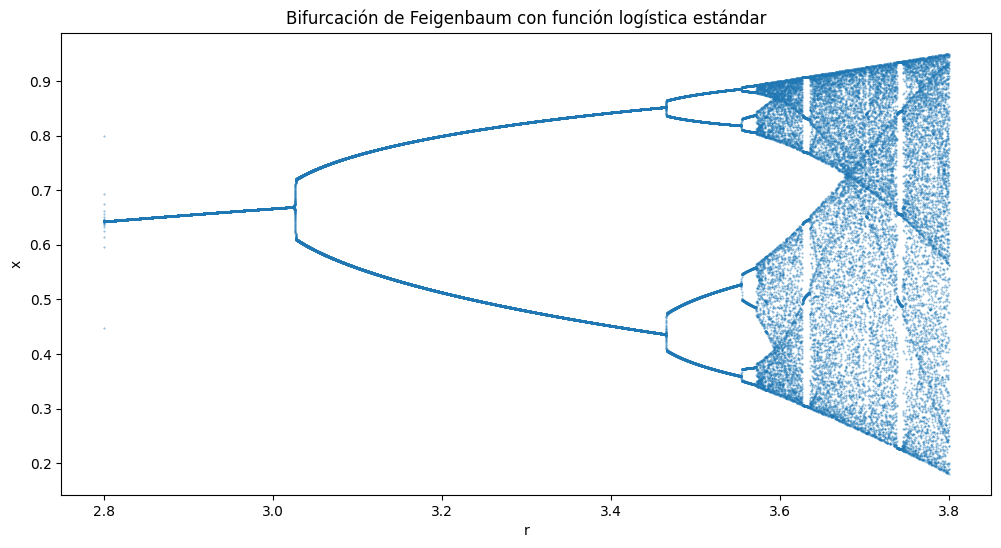

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el diagrama de bifurcación
n = 100_000
r = np.zeros(n)
x = np.zeros(n)

# Inicialización de r y x
r[0] = 2.8
x[0] = 0.8

for i in range(1, n):
    r[i] = r[i - 1] + 1e-5
    x[i] = r[i] * x[i - 1] * (1.0 - x[i - 1])

np.savetxt("feigenbaum_estandar_x.txt", x, fmt='%.18f')

# Creación de la gráfica para visualizar la bifurcación
plt.figure(figsize=(12, 6))
plt.title('Bifurcación de Feigenbaum con función logística estándar')
plt.xlabel('r')
plt.ylabel('x')
plt.plot(r, x, 'o', markersize=0.5, alpha=0.5)  # Puntos más pequeños y más fino
plt.show()

CSV con r y x

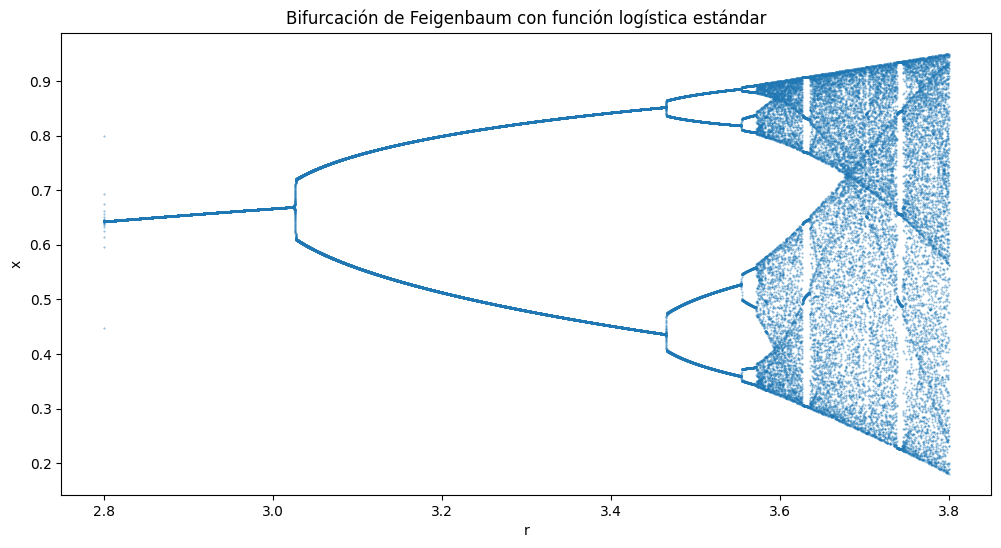

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros para el diagrama de bifurcación
n = 100_000
r = np.zeros(n)
x = np.zeros(n)

# Inicialización de r y x
r[0] = 2.8
x[0] = 0.8

for i in range(1, n):
    r[i] = r[i - 1] + 1e-5
    x[i] = r[i] * x[i - 1] * (1.0 - x[i - 1])

# Guardar en un archivo CSV
data = np.column_stack((r, x))
df = pd.DataFrame(data, columns=['r', 'x'])
df.to_csv("feigenbaum_estandar_rx.csv", index=False, float_format='%.18f')

# Creación de la gráfica para visualizar la bifurcación
plt.figure(figsize=(12, 6))
plt.title('Bifurcación de Feigenbaum con función logística estándar')
plt.xlabel('r')
plt.ylabel('x')
plt.plot(r, x, 'o', markersize=0.5, alpha=0.5)  # Puntos más pequeños y más fino
plt.show()


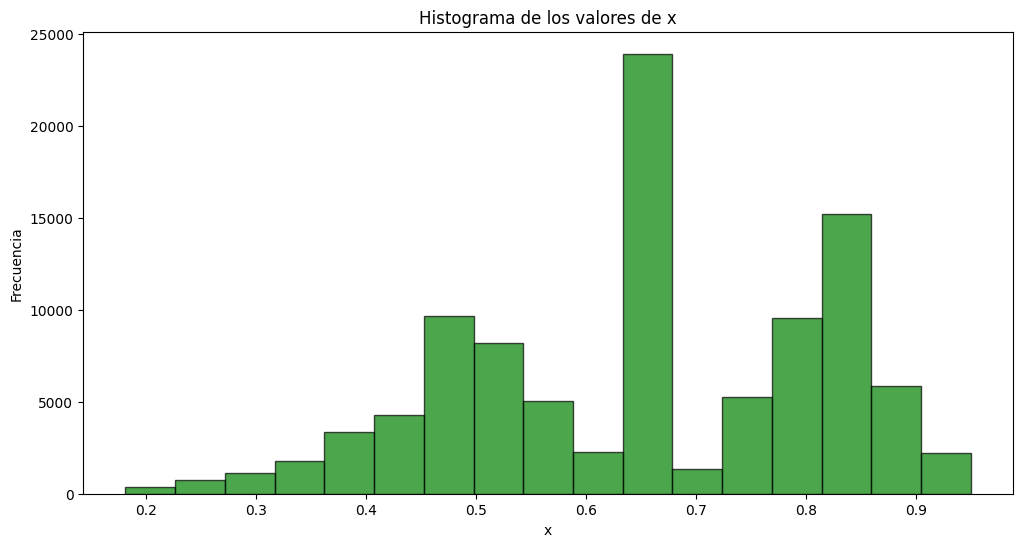

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
x = np.loadtxt("/content/feigenbaum_estandar_x.txt")

# Parámetros para el diagrama de bifurcación
n = len(x)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de x
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(x, bins=bins, color='green', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

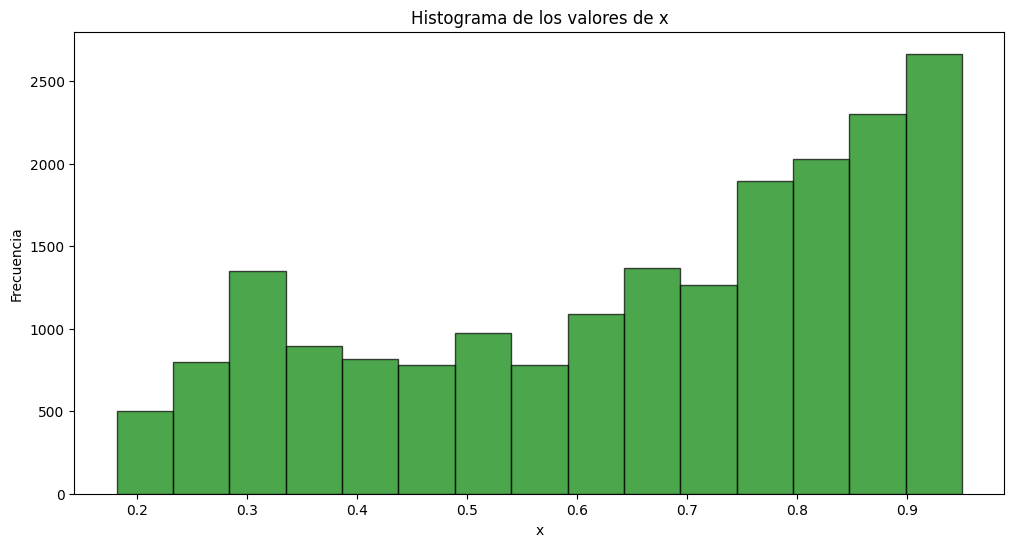

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función para cargar los datos desde una línea específica
def load_from_line(filename, start_line):
    with open(filename, 'r') as file:
        # Saltar las primeras start_line - 1 líneas
        for _ in range(start_line - 1):
            file.readline()
        # Leer el resto del archivo y convertir a numpy array
        data = np.loadtxt(file)
    return data

# Cargar los datos desde la línea 80,000 en adelante
x = load_from_line("/content/feigenbaum_estandar_x.txt", 80500)

# Parámetros para el diagrama de bifurcación
n = len(x)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de x
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(x, bins=bins, color='green', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

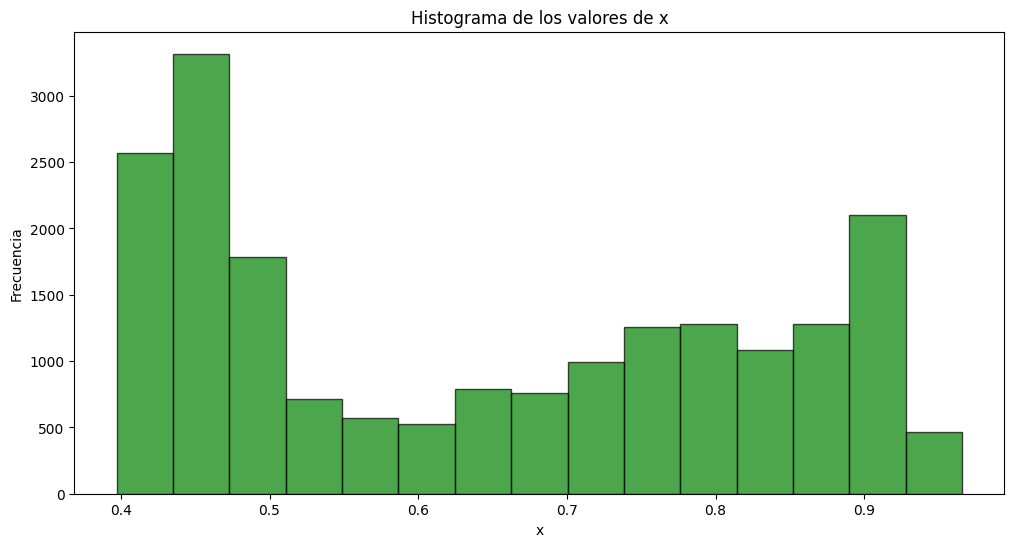

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
x = np.loadtxt("/content/predictions (1).txt")

# Parámetros para el diagrama de bifurcación
n = len(x)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de x
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(x, bins=bins, color='green', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, gmean, entropy

# Cargando los datos de x
x = np.loadtxt("feigenbaum_estandar_x.txt")

# Cálculos básicos
media = np.mean(x)
mediana = np.median(x)
media_geom = gmean(x[x > 0])  # Asegurarse de que x > 0 para la media geométrica
rango = np.ptp(x)  # Pico a pico (max - min)
desviacion_std = np.std(x)
asimetria = skew(x)
curtosis = kurtosis(x)

# Calcular la entropía
probabilidades, _ = np.histogram(x, bins='auto', density=True)
probabilidades = probabilidades[probabilidades > 0]  # Filtrar probabilidades cero para evitar el logaritmo de cero
entropia = entropy(probabilidades, base=2) if probabilidades.size > 0 else None  # Verifica que haya probabilidades para calcular

# Aproximación de la moda usando histograma
frecuencias, bins = np.histogram(x, bins='auto')
moda_aproximada = bins[np.argmax(frecuencias)]  # El bin con la mayor frecuencia

coef_variacion = desviacion_std / media if media != 0 else float('inf')  # Evita división por cero

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda aproximada:", moda_aproximada)
print("Media geométrica:", media_geom)
print("Rango:", rango)
print("Desviación estándar:", desviacion_std)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Entropía:", entropia if entropia is not None else "No calculable")
print("Coeficiente de variación:", coef_variacion)

Media: 0.6539069915320376
Mediana: 0.6581605393300527
Moda aproximada: 0.6522518259002318
Media geométrica: 0.6308423097760829
Rango: 0.7687022285607434
Desviación estándar: 0.16298262474314715
Asimetría: -0.32886565362024484
Curtosis: -0.7593194312436902
Entropía: 5.206921918094152
Coeficiente de variación: 0.24924435256655603


Mapa logístico exponencial

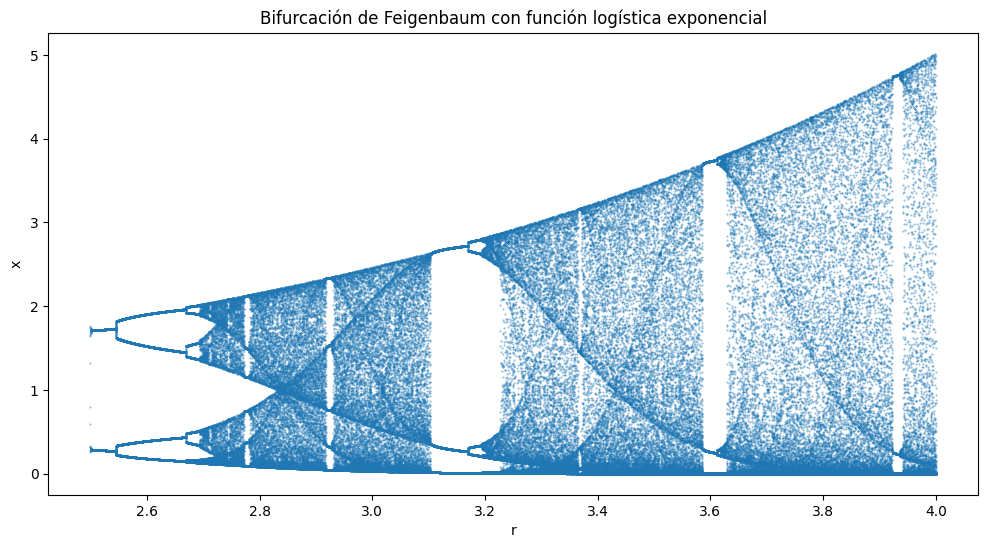

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el diagrama de bifurcación
n = 150_000
r = np.zeros(n)
x = np.zeros(n)

# Inicialización de r y x
r[0] = 2.5
x[0] = 0.8

for i in range(1, n):
    r[i] = r[i - 1] + 1e-5
    x[i] = x[i - 1] * np.exp(r[i - 1] * (1 - x[i - 1]))  # Usando la ecuación logística exponencial

np.savetxt("feigenbaum_exponencial_x.txt", x, fmt='%.18f')

# Creación de la gráfica para visualizar la bifurcación
plt.figure(figsize=(12, 6))
plt.title('Bifurcación de Feigenbaum con función logística exponencial')
plt.xlabel('r')
plt.ylabel('x')
plt.plot(r, x, 'o', markersize=0.5, alpha=0.5)  # Puntos más pequeños y más finos
plt.show()

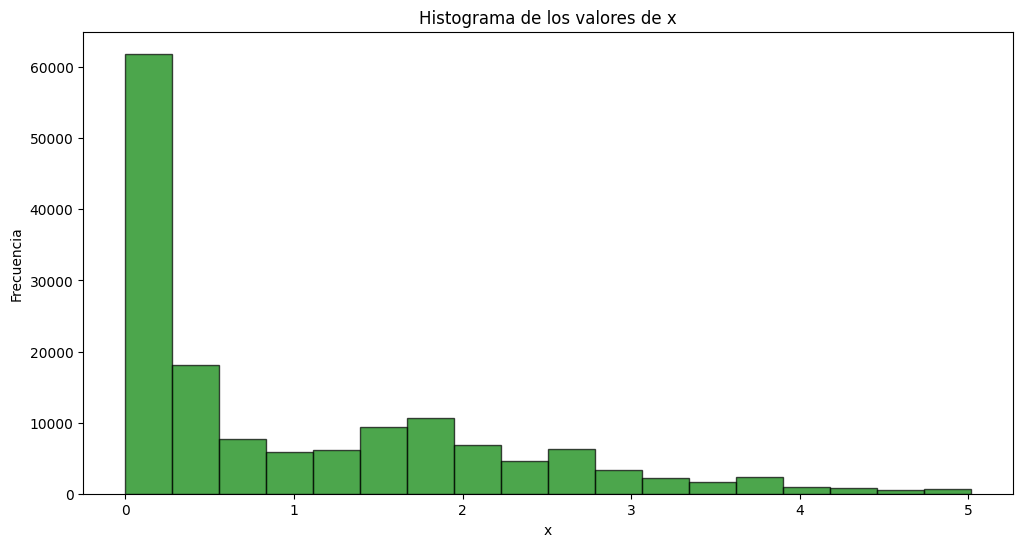

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
x = np.loadtxt("feigenbaum_exponencial_x.txt")

# Parámetros para el diagrama de bifurcación
n = len(x)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de x
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(x, bins=bins, color='green', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, gmean, entropy

# Cargando los datos de x
x = np.loadtxt("feigenbaum_exponencial_x.txt")

# Cálculos básicos
media = np.mean(x)
mediana = np.median(x)
media_geom = gmean(x[x > 0])  # Asegurarse de que x > 0 para la media geométrica
rango = np.ptp(x)  # Pico a pico (max - min)
desviacion_std = np.std(x)
asimetria = skew(x)
curtosis = kurtosis(x)

# Calcular la entropía
probabilidades, _ = np.histogram(x, bins='auto', density=True)
probabilidades = probabilidades[probabilidades > 0]  # Filtrar probabilidades cero para evitar el logaritmo de cero
entropia = entropy(probabilidades, base=2) if probabilidades.size > 0 else None  # Verifica que haya probabilidades para calcular

# Aproximación de la moda usando histograma
frecuencias, bins = np.histogram(x, bins='auto')
moda_aproximada = bins[np.argmax(frecuencias)]  # El bin con la mayor frecuencia

coef_variacion = desviacion_std / media if media != 0 else float('inf')  # Evita división por cero

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda aproximada:", moda_aproximada)
print("Media geométrica:", media_geom)
print("Rango:", rango)
print("Desviación estándar:", desviacion_std)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Entropía:", entropia if entropia is not None else "No calculable")
print("Coeficiente de variación:", coef_variacion)

Media: 1.0000001305470334
Mediana: 0.4276930566217802
Moda aproximada: 5.33052353244e-07
Media geométrica: 0.21035999033863004
Rango: 5.014970549130677
Desviación estándar: 1.122598764051251
Asimetría: 1.1153564171303665
Curtosis: 0.4253026170306433
Entropía: 5.030569009155803
Coeficiente de variación: 1.1225986174993317


**Normas**

In [ ]:
# 2D
import math

def calcular_distancias_2d(archivo_x, archivo_y, archivo_salida):
    with open(archivo_x, 'r') as fx, open(archivo_y, 'r') as fy, open(archivo_salida, 'w') as fs:
        for linea_x, linea_y in zip(fx, fy):
            x = float(linea_x.strip())
            y = float(linea_y.strip())
            distancia = math.sqrt(x**2 + y**2)
            fs.write(f"{distancia}\n")

# Ejemplo de uso
calcular_distancias_2d('henon_x.txt', 'henon_y.txt', 'distancias_henon.txt')

In [ ]:
# 3D
import math

def calcular_distancias(archivo_x, archivo_y, archivo_z, archivo_salida):
    with open(archivo_x, 'r') as fx, open(archivo_y, 'r') as fy, open(archivo_z, 'r') as fz, open(archivo_salida, 'w') as fs:
        for linea_x, linea_y, linea_z in zip(fx, fy, fz):
            x = float(linea_x.strip())
            y = float(linea_y.strip())
            z = float(linea_z.strip())
            distancia = math.sqrt(x**2 + y**2 + z**2)
            fs.write(f"{distancia}\n")

# Ejemplo de uso
calcular_distancias('rossler_x.txt', 'rossler_y.txt', 'rossler_z.txt', 'distancias_rossler.txt')

Escalador

In [ ]:
import numpy as np

# Cargar los datos desde el archivo
data = np.loadtxt('/content/predicciones_feingenbaum.txt')

print(f"Max: {data.max()}")
print(f"Min: {data.min()}")

Max: 0.9658342003822327
Min: 0.21330393850803375


In [ ]:
print(data.max())
print(data.min())

0.9498139788914873
0.1811117503307439


In [ ]:
# Multiplicar cada valor por
data_multiplied = np.abs(data) * 1052

# Guardar los datos multiplicados en un nuevo archivo, sin notación científica
np.savetxt('/content/predicciones_feingenbaum_multiplied.txt', data_multiplied, fmt='%.18f')

* estándar por 1052
* exponencial por 199.40
* cúbico por 1000
* triangular por 1418
* ---------------------------
* henon x por 785
* henon y por 2594
* ---------------------------
* rossler x por 72.80
* rossler y por 76.95
* rossler z por 63.50
* ---------------------------
* distancias henon por 746
* distancias rossler por 54.05

Función logística cúbica

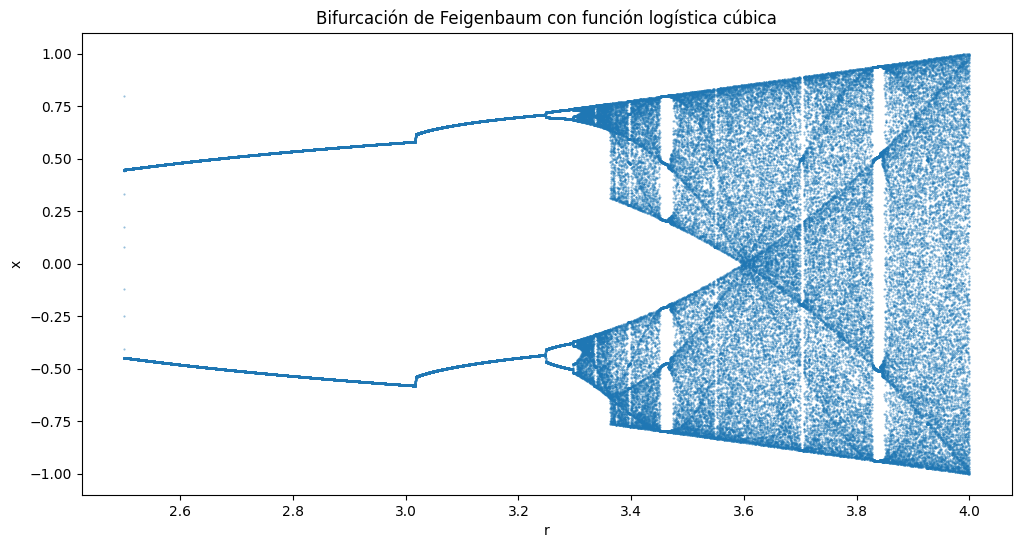

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el diagrama de bifurcación
n = 150_000
r = np.zeros(n)
x = np.zeros(n)

# Inicialización de r y x
r[0] = 2.5
x[0] = 0.8

for i in range(1, n):
    r[i] = r[i - 1] + 1e-5
    x[i] = x[i - 1] + r[i - 1] * x[i - 1] * (x[i - 1]**2 - 1)  # Usando la ecuación logística cúbica

np.savetxt("feigenbaum_cubico_x.txt", x, fmt='%.18f')

# Creación de la gráfica para visualizar la bifurcación
plt.figure(figsize=(12, 6))
plt.title('Bifurcación de Feigenbaum con función logística cúbica')
plt.xlabel('r')
plt.ylabel('x')
plt.plot(r, x, 'o', markersize=0.5, alpha=0.5)  # Puntos más pequeños y más finos
plt.show()

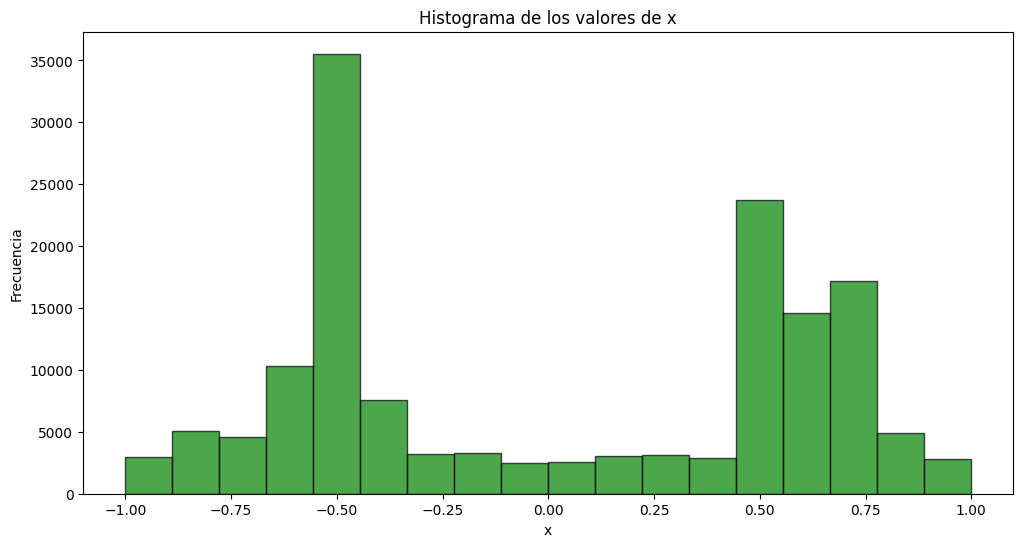

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
x = np.loadtxt("feigenbaum_cubico_x.txt")

# Parámetros para el diagrama de bifurcación
n = len(x)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de x
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(x, bins=bins, color='green', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, gmean, entropy

# Cargando los datos de x
x = np.loadtxt("feigenbaum_cubico_x.txt")

# Cálculos básicos
media = np.mean(x)
mediana = np.median(x)
media_geom = gmean(x[x > 0])  # Asegurarse de que x > 0 para la media geométrica
rango = np.ptp(x)  # Pico a pico (max - min)
desviacion_std = np.std(x)
asimetria = skew(x)
curtosis = kurtosis(x)

# Calcular la entropía
probabilidades, _ = np.histogram(x, bins='auto', density=True)
probabilidades = probabilidades[probabilidades > 0]  # Filtrar probabilidades cero para evitar el logaritmo de cero
entropia = entropy(probabilidades, base=2) if probabilidades.size > 0 else None  # Verifica que haya probabilidades para calcular

# Aproximación de la moda usando histograma
frecuencias, bins = np.histogram(x, bins='auto')
moda_aproximada = bins[np.argmax(frecuencias)]  # El bin con la mayor frecuencia

coef_variacion = desviacion_std / media if media != 0 else float('inf')  # Evita división por cero

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda aproximada:", moda_aproximada)
print("Media geométrica:", media_geom)
print("Rango:", rango)
print("Desviación estándar:", desviacion_std)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Entropía:", entropia if entropia is not None else "No calculable")
print("Coeficiente de variación:", coef_variacion)

Media: 0.023516408804907515
Mediana: -0.006203868362372191
Moda aproximada: -0.5199127400178076
Media geométrica: 0.5045606286943698
Rango: 1.998610819823482
Desviación estándar: 0.571458801934211
Asimetría: 0.0024858824252503332
Curtosis: -1.6305507379868256
Entropía: 4.968370471757218
Coeficiente de variación: 24.30042812552894


Función logística triangular

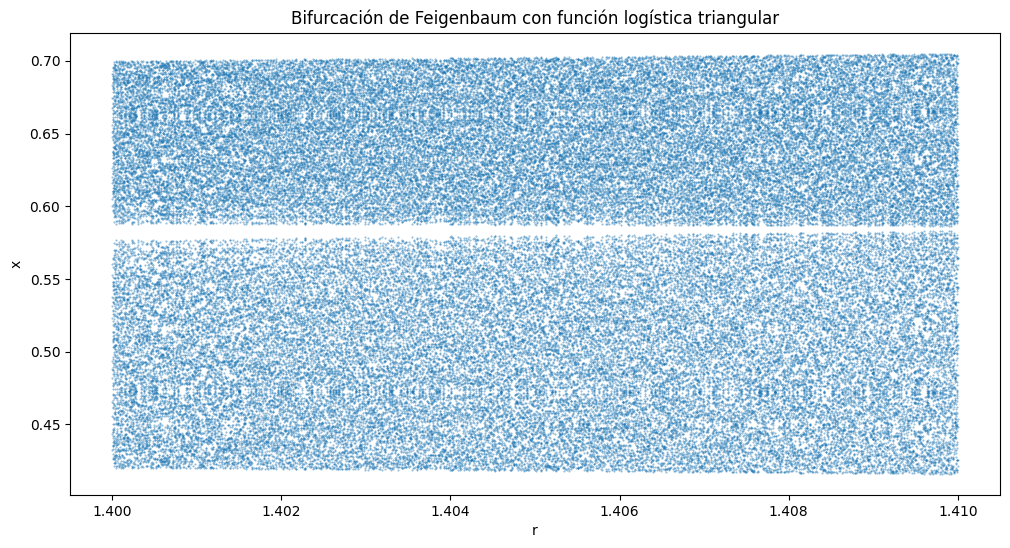

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el diagrama de bifurcación
n = 100_000
r = np.zeros(n, dtype=np.float64)
x = np.zeros(n, dtype=np.float64)

# Inicialización de r y x
r[0] = 1.4 #1.4
x[0] = 0.6 #0.6

for i in range(1, n):
    r[i] = r[i - 1] + 1e-7
    if x[i - 1] < 0.5:
        x[i] = r[i - 1] * x[i - 1]
    else:
        x[i] = r[i - 1] * (1 - x[i - 1])

    # Controlar el valor de x para evitar desbordamientos
    x[i] = max(0, min(x[i], 1))

np.savetxt("feigenbaum_triangular_x.txt", x, fmt='%.18f')

# Creación de la gráfica para visualizar la bifurcación
plt.figure(figsize=(12, 6))
plt.title('Bifurcación de Feigenbaum con función logística triangular')
plt.xlabel('r')
plt.ylabel('x')
plt.plot(r, x, 'o', markersize=0.5, alpha=0.5)  # Puntos más pequeños y más finos
plt.show()

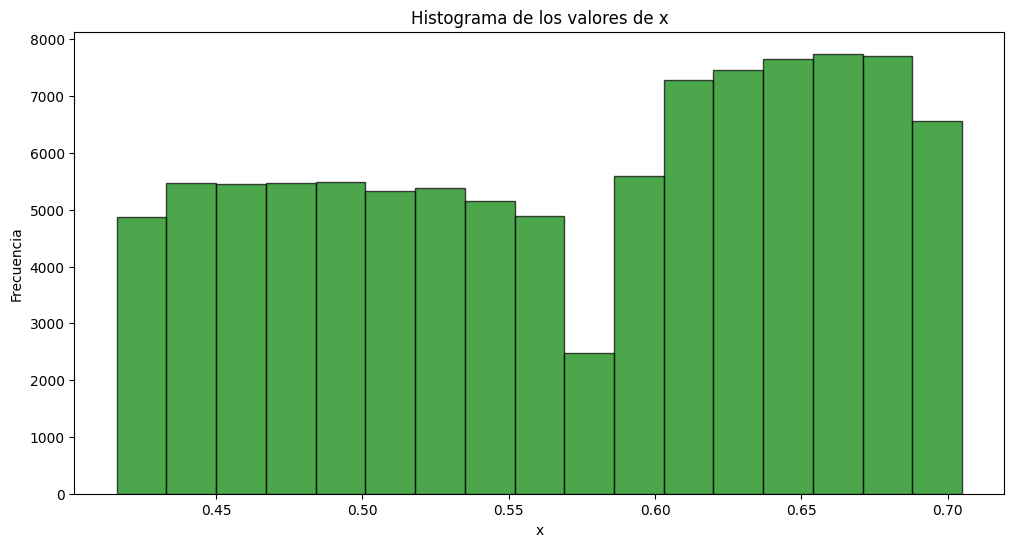

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
x = np.loadtxt("feigenbaum_triangular_x.txt")

# Parámetros para el diagrama de bifurcación
n = len(x)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de x
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(x, bins=bins, color='green', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, gmean, entropy

# Cargando los datos de x
x = np.loadtxt("feigenbaum_triangular_x.txt")

# Cálculos básicos
media = np.mean(x)
mediana = np.median(x)
media_geom = gmean(x[x > 0])  # Asegurarse de que x > 0 para la media geométrica
rango = np.ptp(x)  # Pico a pico (max - min)
desviacion_std = np.std(x)
asimetria = skew(x)
curtosis = kurtosis(x)

# Calcular la entropía
probabilidades, _ = np.histogram(x, bins='auto', density=True)
probabilidades = probabilidades[probabilidades > 0]  # Filtrar probabilidades cero para evitar el logaritmo de cero
entropia = entropy(probabilidades, base=2) if probabilidades.size > 0 else None  # Verifica que haya probabilidades para calcular

# Aproximación de la moda usando histograma
frecuencias, bins = np.histogram(x, bins='auto')
moda_aproximada = bins[np.argmax(frecuencias)]  # El bin con la mayor frecuencia

coef_variacion = desviacion_std / media if media != 0 else float('inf')  # Evita división por cero

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda aproximada:", moda_aproximada)
print("Media geométrica:", media_geom)
print("Rango:", rango)
print("Desviación estándar:", desviacion_std)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Entropía:", entropia if entropia is not None else "No calculable")
print("Coeficiente de variación:", coef_variacion)

Media: 0.5715186100587117
Mediana: 0.5847332746827243
Moda aproximada: 0.6599837761276304
Media geométrica: 0.5649675822331487
Rango: 0.28889461597763083
Desviación estándar: 0.08513058691756574
Asimetría: -0.1870190282911804
Curtosis: -1.2862867114826921
Entropía: 5.441285545568409
Coeficiente de variación: 0.14895505661455247


Henón

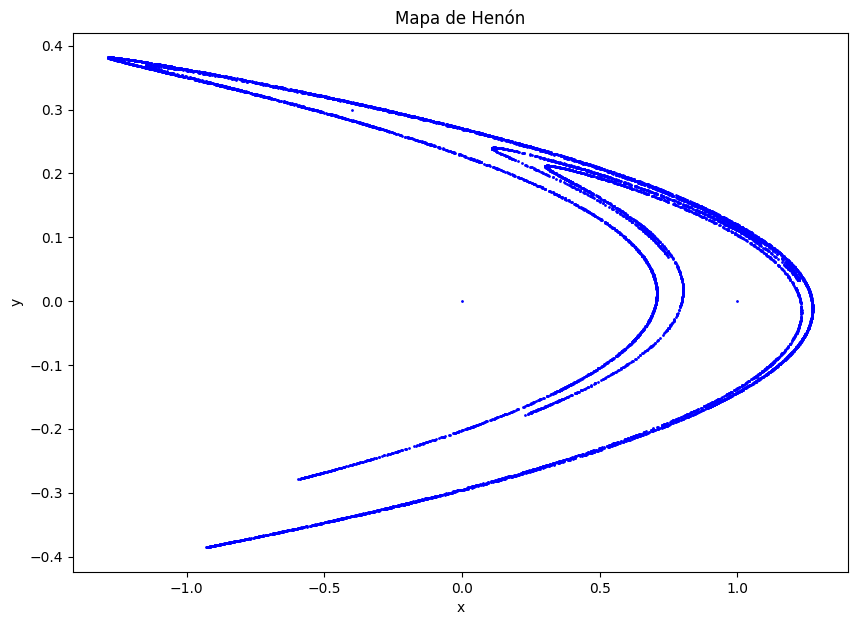

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del mapa de Henón
a = 1.4
b = 0.3

# Número de iteraciones
num_iterations = 10000

# Inicializar los arrays para almacenar los valores de x e y
x = np.zeros(num_iterations)
y = np.zeros(num_iterations)

# Condiciones iniciales
x[0] = 0
y[0] = 0

# Generar los puntos del mapa de Henón
for n in range(num_iterations - 1):
    x[n + 1] = 1 - a * x[n]**2 + y[n]
    y[n + 1] = b * x[n]

# Graficar los puntos con mayor grosor
plt.figure(figsize=(10, 7))
plt.plot(x, y, '.', markersize=2, color='blue')
plt.title('Mapa de Henón')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Guardar los valores de x e y en archivos .txt
np.savetxt("henon_x.txt", x, fmt='%.18f')
np.savetxt("henon_y.txt", y, fmt='%.18f')

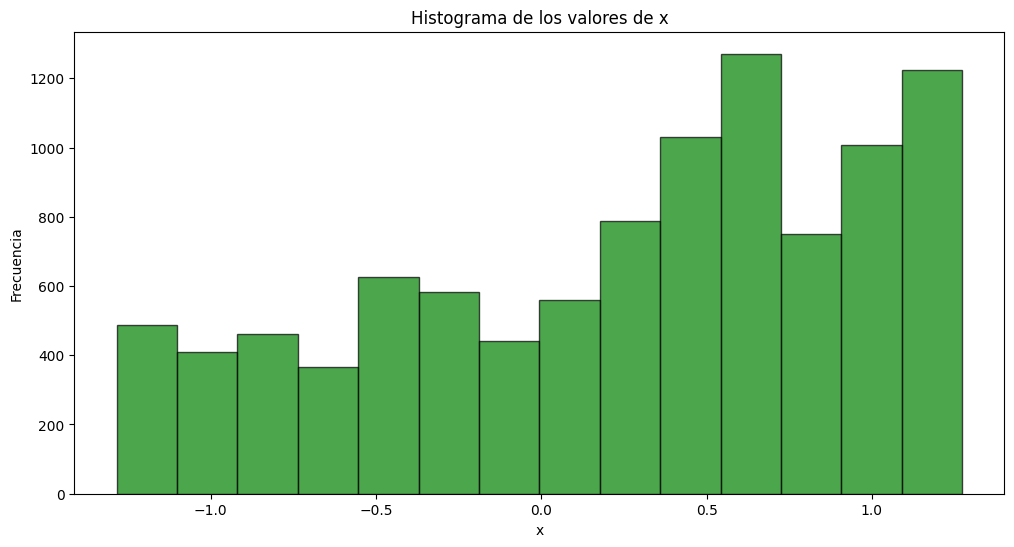

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
x = np.loadtxt("henon_x.txt")

# Parámetros para el diagrama de bifurcación
n = len(x)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de x
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(x, bins=bins, color='green', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, gmean, entropy

# Cargando los datos de x
x = np.loadtxt("henon_x.txt")

# Cálculos básicos
media = np.mean(x)
mediana = np.median(x)
media_geom = gmean(x[x > 0])  # Asegurarse de que x > 0 para la media geométrica
rango = np.ptp(x)  # Pico a pico (max - min)
desviacion_std = np.std(x)
asimetria = skew(x)
curtosis = kurtosis(x)

# Calcular la entropía
probabilidades, _ = np.histogram(x, bins='auto', density=True)
probabilidades = probabilidades[probabilidades > 0]  # Filtrar probabilidades cero para evitar el logaritmo de cero
entropia = entropy(probabilidades, base=2) if probabilidades.size > 0 else None  # Verifica que haya probabilidades para calcular

# Aproximación de la moda usando histograma
frecuencias, bins = np.histogram(x, bins='auto')
moda_aproximada = bins[np.argmax(frecuencias)]  # El bin con la mayor frecuencia

coef_variacion = desviacion_std / media if media != 0 else float('inf')  # Evita división por cero

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda aproximada:", moda_aproximada)
print("Media geométrica:", media_geom)
print("Rango:", rango)
print("Desviación estándar:", desviacion_std)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Entropía:", entropia if entropia is not None else "No calculable")
print("Coeficiente de variación:", coef_variacion)

Media: 0.25135351735948
Mediana: 0.3987826073464452
Moda aproximada: 1.166405254111141
Media geométrica: 0.568379888945878
Rango: 2.5576359730452163
Desviación estándar: 0.7248195985580186
Asimetría: -0.4883841900053514
Curtosis: -0.8757685682897942
Entropía: 4.45450268059619
Coeficiente de variación: 2.8836660261308307


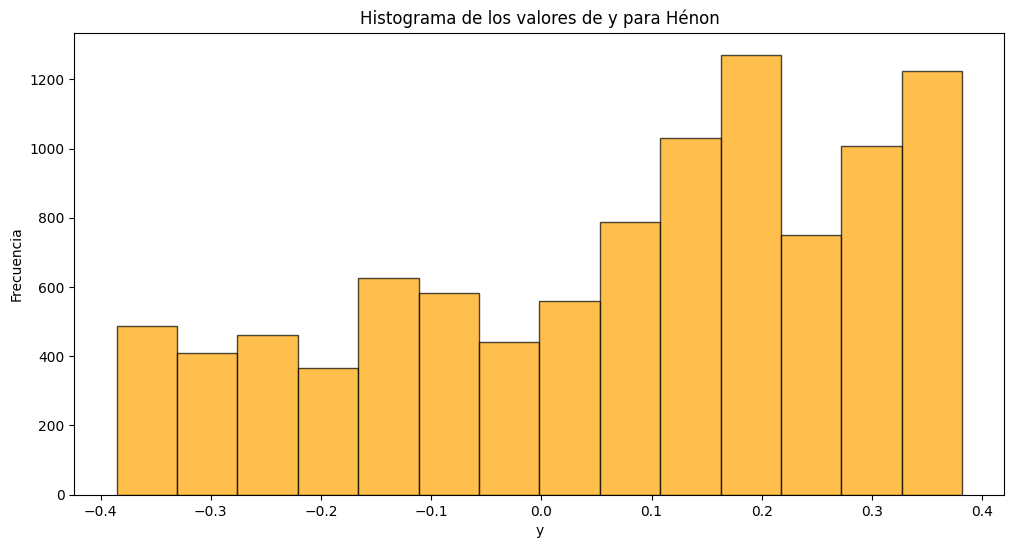

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
y = np.loadtxt("henon_y.txt")

# Parámetros para el diagrama de bifurcación
n = len(y)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de x
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de y para Hénon')
plt.xlabel('y')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(y, bins=bins, color='orange', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, gmean, entropy

# Cargando los datos de y
x = np.loadtxt("henon_y.txt")

# Cálculos básicos
media = np.mean(x)
mediana = np.median(x)
media_geom = gmean(x[x > 0])  # Asegurarse de que x > 0 para la media geométrica
rango = np.ptp(x)  # Pico a pico (max - min)
desviacion_std = np.std(x)
asimetria = skew(x)
curtosis = kurtosis(x)

# Calcular la entropía
probabilidades, _ = np.histogram(x, bins='auto', density=True)
probabilidades = probabilidades[probabilidades > 0]  # Filtrar probabilidades cero para evitar el logaritmo de cero
entropia = entropy(probabilidades, base=2) if probabilidades.size > 0 else None  # Verifica que haya probabilidades para calcular

# Aproximación de la moda usando histograma
frecuencias, bins = np.histogram(x, bins='auto')
moda_aproximada = bins[np.argmax(frecuencias)]  # El bin con la mayor frecuencia

coef_variacion = desviacion_std / media if media != 0 else float('inf')  # Evita división por cero

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda aproximada:", moda_aproximada)
print("Media geométrica:", media_geom)
print("Rango:", rango)
print("Desviación estándar:", desviacion_std)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Entropía:", entropia if entropia is not None else "No calculable")
print("Coeficiente de variación:", coef_variacion)

Media: 0.07539050831625498
Mediana: 0.11959972010221057
Moda aproximada: 0.3499215762333423
Media geométrica: 0.17051634882579136
Rango: 0.767290791913565
Desviación estándar: 0.21744571253599587
Asimetría: -0.48817998394507983
Curtosis: -0.8759020789337506
Entropía: 4.454610767703797
Coeficiente de variación: 2.8842584748710642


Rössler

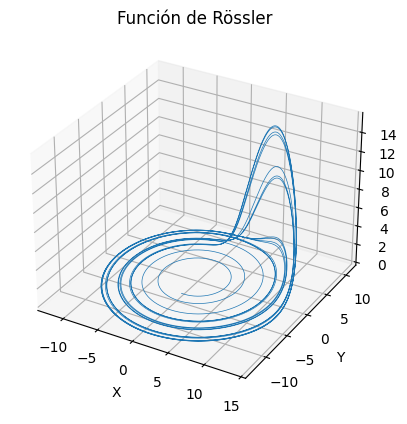

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos los parámetros de Rössler
a = 0.1
b = 0.1
d = 8.0
dt = 0.01  # Paso de tiempo
n = 10_000  # Número de iteraciones

# Inicializamos los arrays para x, y, z
x = np.zeros(n)
y = np.zeros(n)
z = np.zeros(n)

# Condiciones iniciales
x[0] = 0.0
y[0] = -3.8
z[0] = 0.0

# Iteramos para llenar los arrays con los valores de Rössler
for i in range(1, n):
    x[i] = x[i-1] + (-y[i-1] - z[i-1]) * dt
    y[i] = y[i-1] + (x[i-1] + a * y[i-1]) * dt
    z[i] = z[i-1] + (b + z[i-1] * (x[i-1] - d)) * dt
    # dt += 1e-6

# Guardamos los datos en archivos de texto
np.savetxt("rossler_x.txt", x, fmt='%.18f')
np.savetxt("rossler_y.txt", y, fmt='%.18f')
np.savetxt("rossler_z.txt", z, fmt='%.18f')

# Creamos la gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujamos la curva en 3D
ax.plot(x, y, z, lw=0.5)

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Función de Rössler')

# Mostramos la gráfica
plt.show()

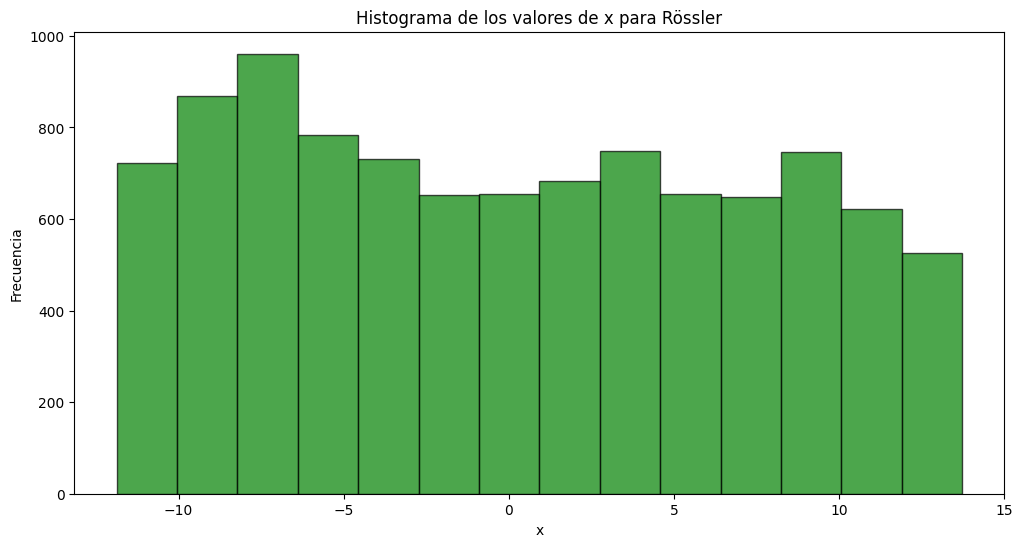

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
x = np.loadtxt("rossler_x.txt")

# Parámetros para el diagrama de bifurcación
n = len(x)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de x
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de x para Rössler')
plt.xlabel('x')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(x, bins=bins, color='green', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, gmean, entropy

# Cargando los datos de x
x = np.loadtxt("rossler_x.txt")

# Cálculos básicos
media = np.mean(x)
mediana = np.median(x)
media_geom = gmean(x[x > 0])  # Asegurarse de que x > 0 para la media geométrica
rango = np.ptp(x)  # Pico a pico (max - min)
desviacion_std = np.std(x)
asimetria = skew(x)
curtosis = kurtosis(x)

# Calcular la entropía
probabilidades, _ = np.histogram(x, bins='auto', density=True)
probabilidades = probabilidades[probabilidades > 0]  # Filtrar probabilidades cero para evitar el logaritmo de cero
entropia = entropy(probabilidades, base=2) if probabilidades.size > 0 else None  # Verifica que haya probabilidades para calcular

# Aproximación de la moda usando histograma
frecuencias, bins = np.histogram(x, bins='auto')
moda_aproximada = bins[np.argmax(frecuencias)]  # El bin con la mayor frecuencia

coef_variacion = desviacion_std / media if media != 0 else float('inf')  # Evita división por cero

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda aproximada:", moda_aproximada)
print("Media geométrica:", media_geom)
print("Rango:", rango)
print("Desviación estándar:", desviacion_std)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Entropía:", entropia if entropia is not None else "No calculable")
print("Coeficiente de variación:", coef_variacion)

Media: 0.1840709607169142
Mediana: -0.07979312150724696
Moda aproximada: -8.381277401106043
Media geométrica: 4.9015999060257895
Rango: 25.604398984226027
Desviación estándar: 7.377902784807576
Asimetría: 0.11682677811296398
Curtosis: -1.2215501265789612
Entropía: 4.437848266131074
Coeficiente de variación: 40.08183993864288


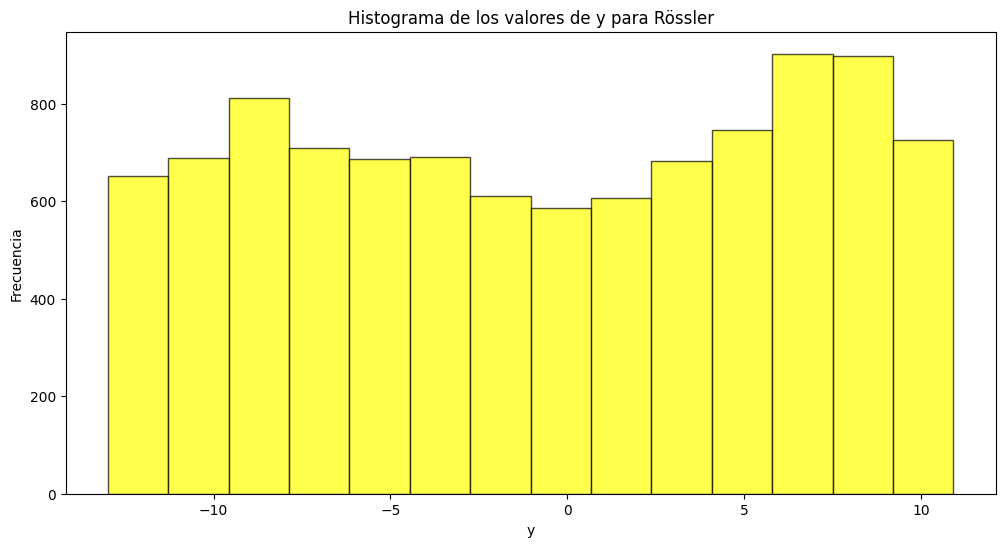

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
y = np.loadtxt("rossler_y.txt")

# Parámetros para el diagrama de bifurcación
n = len(y)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de y
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de y para Rössler')
plt.xlabel('y')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(y, bins=bins, color='yellow', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, gmean, entropy

# Cargando los datos de y
x = np.loadtxt("rossler_y.txt")

# Cálculos básicos
media = np.mean(x)
mediana = np.median(x)
media_geom = gmean(x[x > 0])  # Asegurarse de que x > 0 para la media geométrica
rango = np.ptp(x)  # Pico a Pico (max - min)
desviacion_std = np.std(x)
asimetria = skew(x)
curtosis = kurtosis(x)

# Calcular la entropía
probabilidades, _ = np.histogram(x, bins='auto', density=True)
probabilidades = probabilidades[probabilidades > 0]  # Filtrar probabilidades cero para evitar el logaritmo de cero
entropia = entropy(probabilidades, base=2) if probabilidades.size > 0 else None  # Verifica que haya probabilidades para calcular

# Aproximación de la moda usando histograma
frecuencias, bins = np.histogram(x, bins='auto')
moda_aproximada = bins[np.argmax(frecuencias)]  # El bin con la mayor frecuencia

coef_variacion = desviacion_std / media if media != 0 else float('inf')  # Evita división por cero

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda aproximada:", moda_aproximada)
print("Media geométrica:", media_geom)
print("Rango:", rango)
print("Desviación estándar:", desviacion_std)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Entropía:", entropia if entropia is not None else "No calculable")
print("Coeficiente de variación:", coef_variacion)

Media: -0.6887245913665998
Mediana: -0.5990049261524781
Moda aproximada: 7.328000911552497
Media geométrica: 4.466150829377366
Rango: 23.900751519226546
Desviación estándar: 7.074571636292623
Asimetría: -0.05158482139061138
Curtosis: -1.2944055420448082
Entropía: 4.305881897872131
Coeficiente de variación: -10.271989304541782


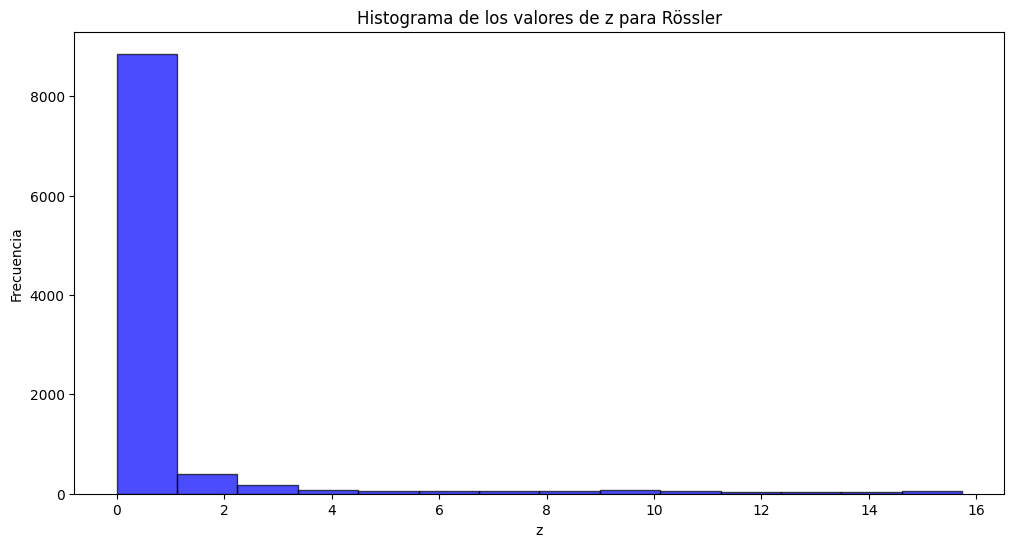

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo
x = np.loadtxt("rossler_z.txt")

# Parámetros para el diagrama de bifurcación
n = len(x)  # Usar el número de muestras cargadas para determinar n

# Crear el histograma de los valores de z
plt.figure(figsize=(12, 6))
plt.title('Histograma de los valores de z para Rössler')
plt.xlabel('z')
plt.ylabel('Frecuencia')

# Calcular el número de bins usando la regla de Sturges
bins = int(1 + np.log2(n))
plt.hist(z, bins=bins, color='blue', alpha=0.7, edgecolor='black')  # Histograma con bins según la regla de Sturges
plt.show()

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, gmean, entropy

# Cargando los datos de z
x = np.loadtxt("rossler_z.txt")

# Cálculos básicos
media = np.mean(x)
mediana = np.median(x)
media_geom = gmean(x[x > 0])  # Asegurarse de que x > 0 para la media geométrica
rango = np.ptp(x)  # Pico a pico (max - min)
desviacion_std = np.std(x)
asimetria = skew(x)
curtosis = kurtosis(x)

# Calcular la entropía
probabilidades, _ = np.histogram(x, bins='auto', density=True)
probabilidades = probabilidades[probabilidades > 0]  # Filtrar probabilidades cero para evitar el logaritmo de cero
entropia = entropy(probabilidades, base=2) if probabilidades.size > 0 else None  # Verifica que haya probabilidades para calcular

# Aproximación de la moda usando histograma
frecuencias, bins = np.histogram(x, bins='auto')
moda_aproximada = bins[np.argmax(frecuencias)]  # El bin con la mayor frecuencia

coef_variacion = desviacion_std / media if media != 0 else float('inf')  # Evita división por cero

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda aproximada:", moda_aproximada)
print("Media geométrica:", media_geom)
print("Rango:", rango)
print("Desviación estándar:", desviacion_std)
print("Asimetría:", asimetria)
print("Curtosis:", curtosis)
print("Entropía:", entropia if entropia is not None else "No calculable")
print("Coeficiente de variación:", coef_variacion)

Media: 0.6869429172748319
Mediana: 0.014627479584134339
Moda aproximada: 0.0
Media geométrica: 0.0373034978572559
Rango: 15.734437381504351
Desviación estándar: 2.2321974027300597
Asimetría: 4.4327733943865
Curtosis: 20.51074037869482
Entropía: 4.4855970501601465
Coeficiente de variación: 3.2494656347654036


Coeficiente de Lyapunov para Feigenbaum (estándar)

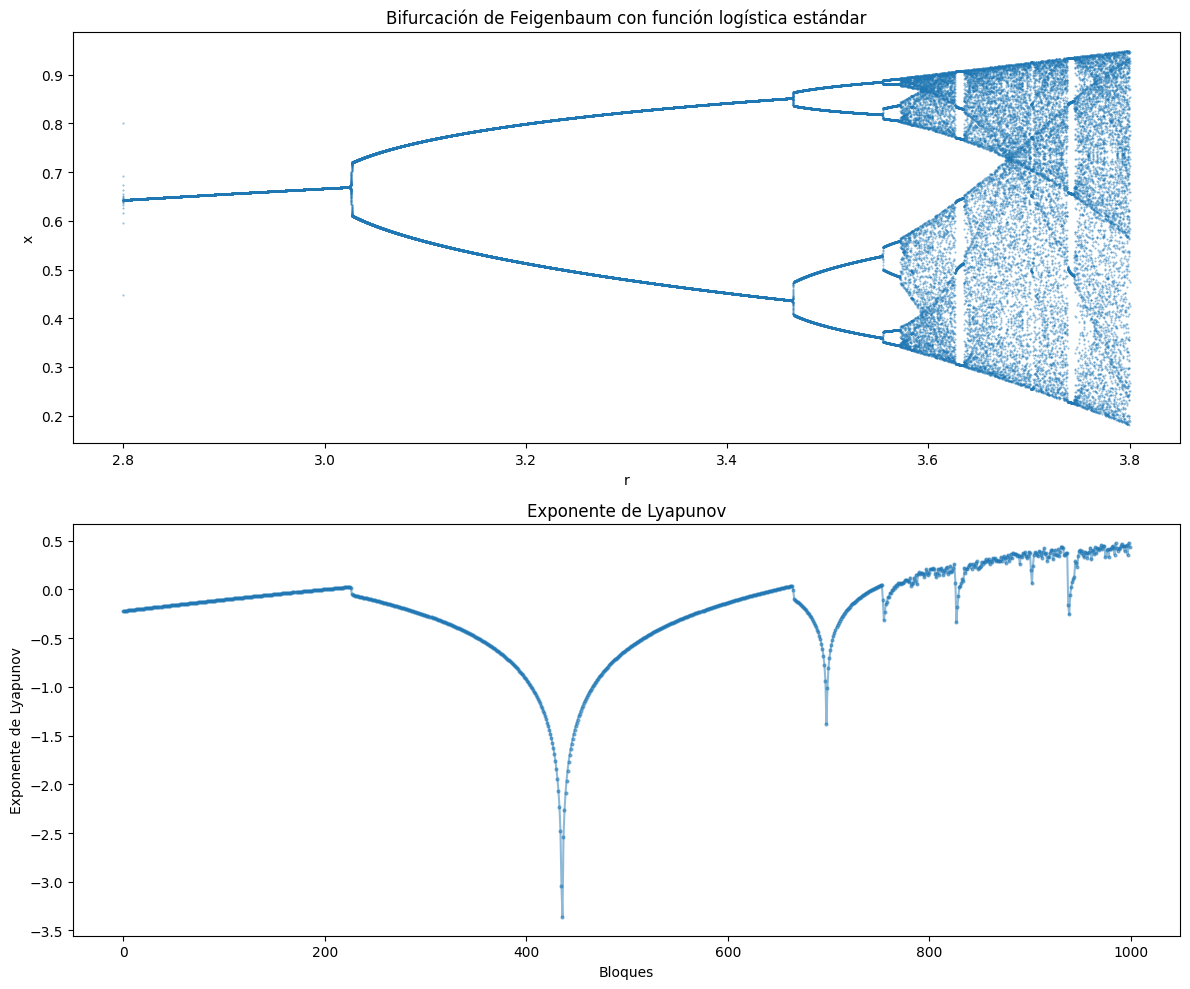

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1.0 - x)

def lyapunov_exponent(r_values, x_values, window_size=100):
    n = len(r_values)
    num_blocks = n // window_size
    exponents = []

    for i in range(num_blocks):
        start = i * window_size
        end = start + window_size
        x_block = x_values[start:end]
        r_block = r_values[start:end]
        lyapunov_sum = 0

        for x, r in zip(x_block, r_block):
            lyapunov_sum += np.log(abs(r * (1 - 2 * x)))

        lyapunov_exp = lyapunov_sum / window_size
        exponents.append(lyapunov_exp)

    return np.array(exponents)

# Parámetros para el diagrama de bifurcación
n = 100_000
r = np.zeros(n)
x = np.zeros(n)

# Inicialización de r y x
r[0] = 2.8
x[0] = 0.8

for i in range(1, n):
    r[i] = r[i - 1] + 1e-5
    x[i] = logistic_map(x[i - 1], r[i])

np.savetxt("feigenbaum_estandar_x.txt", x, fmt='%.18f')

# Cálculo de los exponentes de Lyapunov
window_size = 100
lyapunov_exps = lyapunov_exponent(r, x, window_size)

# Creación de la gráfica para visualizar la bifurcación
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.title('Bifurcación de Feigenbaum con función logística estándar')
plt.xlabel('r')
plt.ylabel('x')
plt.plot(r, x, 'o', markersize=0.5, alpha=0.5)  # Puntos más pequeños y más fino

# Gráfica del espectro de los exponentes de Lyapunov
plt.subplot(2, 1, 2)
plt.title('Exponente de Lyapunov')
plt.xlabel('Bloques')
plt.ylabel('Exponente de Lyapunov')
plt.plot(np.arange(len(lyapunov_exps)), lyapunov_exps, 'o-', markersize=2, alpha=0.5)
plt.tight_layout()
plt.show()

# Guardar los exponentes de Lyapunov en un archivo
np.savetxt("lyapunov_exponents.txt", lyapunov_exps, fmt='%.18f')

Dimensión de Kaplan-Yorke: 747.9735200475559
Valor de K: 747


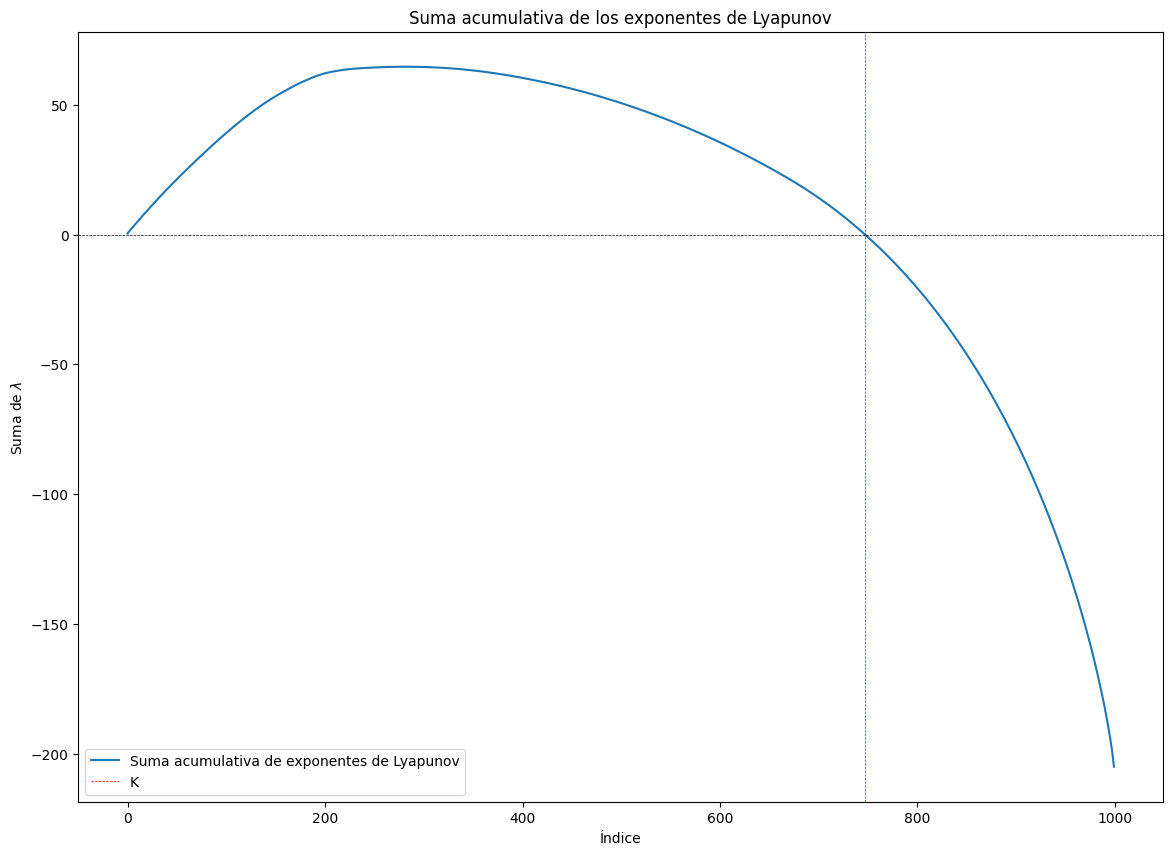

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1.0 - x)

def lyapunov_exponent(r_values, x_values, window_size=100):
    n = len(r_values)
    num_blocks = n // window_size
    exponents = []

    for i in range(num_blocks):
        start = i * window_size
        end = start + window_size
        x_block = x_values[start:end]
        r_block = r_values[start:end]
        lyapunov_sum = 0

        for x, r in zip(x_block, r_block):
            lyapunov_sum += np.log(abs(r * (1 - 2 * x)))

        lyapunov_exp = lyapunov_sum / window_size
        exponents.append(lyapunov_exp)

    return np.array(exponents)

def kaplan_yorke_dimension(lyapunov_exponents):
    # Ordenar los exponentes de Lyapunov de mayor a menor
    lyapunov_exponents = np.sort(lyapunov_exponents)[::-1]

    # Calcular la suma acumulada
    cumulative_sum = np.cumsum(lyapunov_exponents)

    # Encontrar K
    K = 0
    for i in range(len(cumulative_sum)):
        if cumulative_sum[i] >= 0:
            K = i + 1
        else:
            break

    # Calcular la dimensión de Kaplan-Yorke
    if K == len(lyapunov_exponents):
        return float('inf')  # Caso en el que todos los exponentes de Lyapunov son no negativos
    else:
        sum_K = sum(lyapunov_exponents[:K])
        d_KY = K + sum_K / abs(lyapunov_exponents[K])
        return d_KY, K, cumulative_sum

# Parámetros para el diagrama de bifurcación
n = 100_000
r = np.zeros(n)
x = np.zeros(n)

# Inicialización de r y x
r[0] = 2.8
x[0] = 0.8

for i in range(1, n):
    r[i] = r[i - 1] + 1e-5
    x[i] = logistic_map(x[i - 1], r[i])

np.savetxt("feigenbaum_estandar_x.txt", x, fmt='%.18f')

# Cálculo de los exponentes de Lyapunov
window_size = 100
lyapunov_exps = lyapunov_exponent(r, x, window_size)

# Calcular la dimensión de Kaplan-Yorke
d_KY, K, cumulative_sum = kaplan_yorke_dimension(lyapunov_exps)
print("Dimensión de Kaplan-Yorke:", d_KY)
print("Valor de K:", K)

# Gráfica de la suma acumulativa de los exponentes de Lyapunov
plt.figure(figsize=(14, 10))
plt.plot(cumulative_sum, label='Suma acumulativa de exponentes de Lyapunov')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(K, color='red', linewidth=0.5, linestyle='--', label='K')
plt.xlabel('Índice')
plt.ylabel('Suma de $\lambda$')
plt.title('Suma acumulativa de los exponentes de Lyapunov')
plt.legend()
plt.show()

# Guardar los exponentes de Lyapunov en un archivo
np.savetxt("lyapunov_exponents.txt", lyapunov_exps, fmt='%.18f')

Índice	Suma Acumulada de Exponentes de Lyapunov
0	0.47766707719423374
1	0.9497034709877088
2	1.4190716937194958
3	1.8758218859666427
4	2.3289175952295906
5	2.7759652482587347
6	3.2220780286073913
7	3.667161546937955
8	4.110771547764397
9	4.553692445574635
10	4.994277412741998
11	5.434433475257939
12	5.873603777829189
13	6.311693608747119
14	6.743425062853123
15	7.173820703872482
16	7.604118713482049
17	8.033292151253766
18	8.461215699506816
19	8.888821757720201
20	9.31516937616742
21	9.73634935556308
22	10.15729215179207
23	10.578045936366927
24	10.998232572383147
25	11.415478417572826
26	11.832618905171246
27	12.246329218473102
28	12.658695540701762
29	13.0709559431919
30	13.482950121968607
31	13.894262607061147
32	14.302047532839772
33	14.708879187574313
34	15.114568489175458
35	15.519634496267177
36	15.923838759175867
37	16.32535079187697
38	16.72607515481222
39	17.1243413472296
40	17.51907730748417
41	17.91202127707104
42	18.304880457721858
43	18.694544902590152
44	19.0835714622006

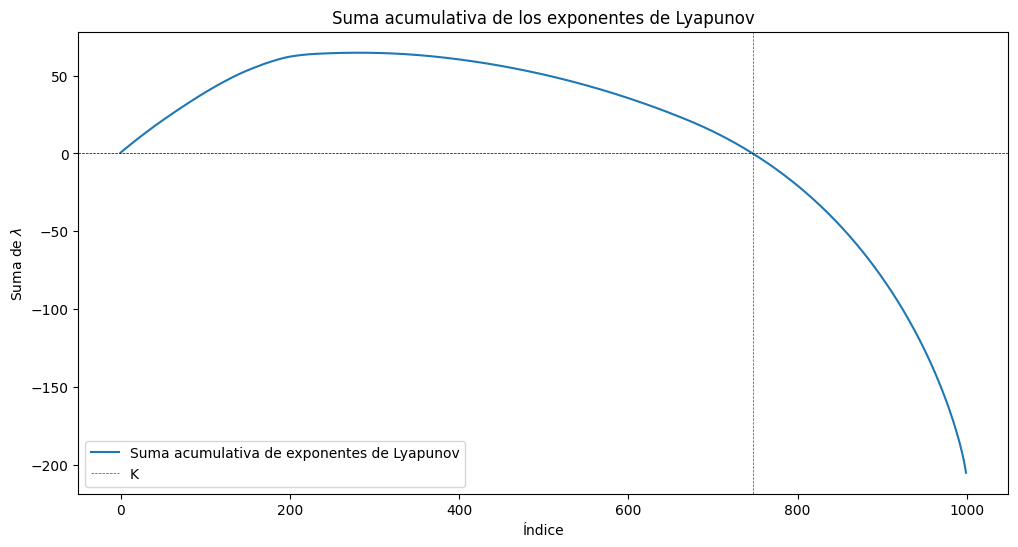

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1.0 - x)

def lyapunov_exponent(r_values, x_values, window_size=100):
    n = len(r_values)
    num_blocks = n // window_size
    exponents = []

    for i in range(num_blocks):
        start = i * window_size
        end = start + window_size
        x_block = x_values[start:end]
        r_block = r_values[start:end]
        lyapunov_sum = 0

        for x, r in zip(x_block, r_block):
            lyapunov_sum += np.log(abs(r * (1 - 2 * x)))

        lyapunov_exp = lyapunov_sum / window_size
        exponents.append(lyapunov_exp)

    return np.array(exponents)

def kaplan_yorke_dimension(lyapunov_exponents):
    # Ordenar los exponentes de Lyapunov de mayor a menor
    lyapunov_exponents = np.sort(lyapunov_exponents)[::-1]

    # Calcular la suma acumulada
    cumulative_sum = np.cumsum(lyapunov_exponents)

    # Imprimir los valores acumulados y sus índices
    print("Índice\tSuma Acumulada de Exponentes de Lyapunov")
    for i, sum_val in enumerate(cumulative_sum):
        print(f"{i}\t{sum_val}")

    # Encontrar K
    K = 0
    for i in range(len(cumulative_sum)):
        if cumulative_sum[i] >= 0:
            K = i + 1
        else:
            break

    # Calcular la dimensión de Kaplan-Yorke
    if K == len(lyapunov_exponents):
        return float('inf'), K, cumulative_sum  # Caso en el que todos los exponentes de Lyapunov son no negativos
    else:
        sum_K = sum(lyapunov_exponents[:K])
        d_KY = K + sum_K / abs(lyapunov_exponents[K])
        return d_KY, K, cumulative_sum

# Parámetros para el diagrama de bifurcación
n = 100_000
r = np.zeros(n)
x = np.zeros(n)

# Inicialización de r y x
r[0] = 2.8
x[0] = 0.8

for i in range(1, n):
    r[i] = r[i - 1] + 1e-5
    x[i] = logistic_map(x[i - 1], r[i])

np.savetxt("feigenbaum_estandar_x.txt", x, fmt='%.18f')

# Cálculo de los exponentes de Lyapunov
window_size = 100
lyapunov_exps = lyapunov_exponent(r, x, window_size)

# Calcular la dimensión de Kaplan-Yorke
d_KY, K, cumulative_sum = kaplan_yorke_dimension(lyapunov_exps)
print("Dimensión de Kaplan-Yorke:", d_KY)
print("Valor de K:", K)

# Gráfica de la suma acumulativa de los exponentes de Lyapunov
plt.figure(figsize=(12, 6))
plt.plot(cumulative_sum, label='Suma acumulativa de exponentes de Lyapunov')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(K, color='red', linewidth=0.5, linestyle='--', label='K')
plt.xlabel('Índice')
plt.ylabel('Suma de $\lambda$')
plt.title('Suma acumulativa de los exponentes de Lyapunov')
plt.legend()
plt.show()

# Guardar los exponentes de Lyapunov en un archivo
np.savetxt("lyapunov_exponents.txt", lyapunov_exps, fmt='%.18f')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para el diagrama de bifurcación
n = 100_000
r = np.zeros(n)
x = np.zeros(n)

# Inicialización de r y x
r[0] = 2.8
x[0] = 0.8

for i in range(1, n):
    r[i] = r[i - 1] + 1e-5
    x[i] = r[i] * x[i - 1] * (1.0 - x[i - 1])

# Guardar los datos
np.savetxt("feigenbaum_estandar_x.txt", x)

# Función de correlación
def correlation_dimension(x, epsilons):
    n = len(x)
    c = np.zeros(len(epsilons))

    for i, epsilon in enumerate(epsilons):
        count = 0
        for j in range(n):
            for k in range(j + 1, n):
                if abs(x[j] - x[k]) < epsilon:
                    count += 1
        c[i] = count * 2 / (n * (n - 1))

    return c

# Rango de epsilons
epsilons = np.logspace(-5, 0, 50)

# Calcular la dimensión de correlación
c_epsilons = correlation_dimension(x, epsilons)

# Ajuste lineal en escala log-log para obtener la dimensión de correlación
log_epsilons = np.log(epsilons)
log_c_epsilons = np.log(c_epsilons)

coeffs = np.polyfit(log_epsilons, log_c_epsilons, 1)
D = coeffs[0]

print(f"Dimensión de correlación D para Feigenbaum: {D}")

# Graficar la función de correlación
plt.figure(figsize=(12, 6))
plt.plot(log_epsilons, log_c_epsilons, 'o', markersize=5, alpha=0.7)
plt.plot(log_epsilons, np.polyval(coeffs, log_epsilons), 'r', label=f"Ajuste lineal: D = {D:.3f}")
plt.title('Dimensión de correlación para el atractor de Feigenbaum')
plt.xlabel('log(ε)')
plt.ylabel('log(C(ε))')
plt.legend()
plt.show()

KeyboardInterrupt: 

D para Feigenbaum

Dimensión de correlación D para Feigenbaum: 0.72908


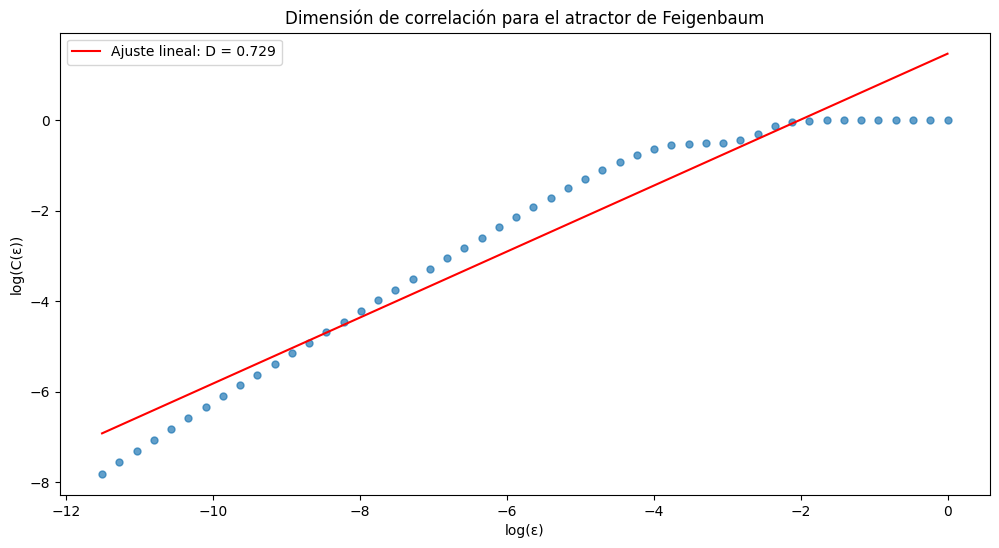

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Parámetros para el diagrama de bifurcación
n = 30_000  # Número de iteraciones
r = np.zeros(n)
x = np.zeros(n)

# Inicialización de r y x
r[0] = 2.8
x[0] = 0.8

# Generación de la serie temporal
for i in range(1, n):
    r[i] = r[i - 1] + 1e-5
    x[i] = r[i] * x[i - 1] * (1.0 - x[i - 1])

# Guardar los datos
np.savetxt("feigenbaum_estandar_x.txt", x)

# Función de correlación
def correlation_dimension(x, epsilons):
    d = pdist(x.reshape(-1, 1))  # Calcula las distancias entre los puntos
    c = np.zeros(len(epsilons))

    # Cálculo de C(ε) para cada epsilon
    for i, epsilon in enumerate(epsilons):
        c[i] = np.sum(d < epsilon)

    # Normalización de C(ε)
    c = c * 2 / (len(x) * (len(x) - 1))
    return c

# Rango de epsilons
epsilons = np.logspace(-5, 0, 50)

# Calcular la dimensión de correlación
c_epsilons = correlation_dimension(x, epsilons)

# Verificar que no haya valores cero o negativos en C(ε)
if np.any(c_epsilons <= 0):
    raise ValueError("Valores de C(ε) no deben ser cero o negativos. Ajusta el rango de ε.")

# Ajuste lineal en escala log-log para obtener la dimensión de correlación
log_epsilons = np.log(epsilons)
log_c_epsilons = np.log(c_epsilons)

coeffs = np.polyfit(log_epsilons, log_c_epsilons, 1)
D = coeffs[0]

print(f"Dimensión de correlación D para Feigenbaum: {D:.5f}")

# Graficar la función de correlación
plt.figure(figsize=(12, 6))
plt.plot(log_epsilons, log_c_epsilons, 'o', markersize=5, alpha=0.7)
plt.plot(log_epsilons, np.polyval(coeffs, log_epsilons), 'r', label=f"Ajuste lineal: D = {D:.3f}")
plt.title('Dimensión de correlación para el atractor de Feigenbaum')
plt.xlabel('log(ε)')
plt.ylabel('log(C(ε))')
plt.legend()
plt.show()

D para Hénon

Dimensión de correlación D para el mapa de Henón: 1.17623


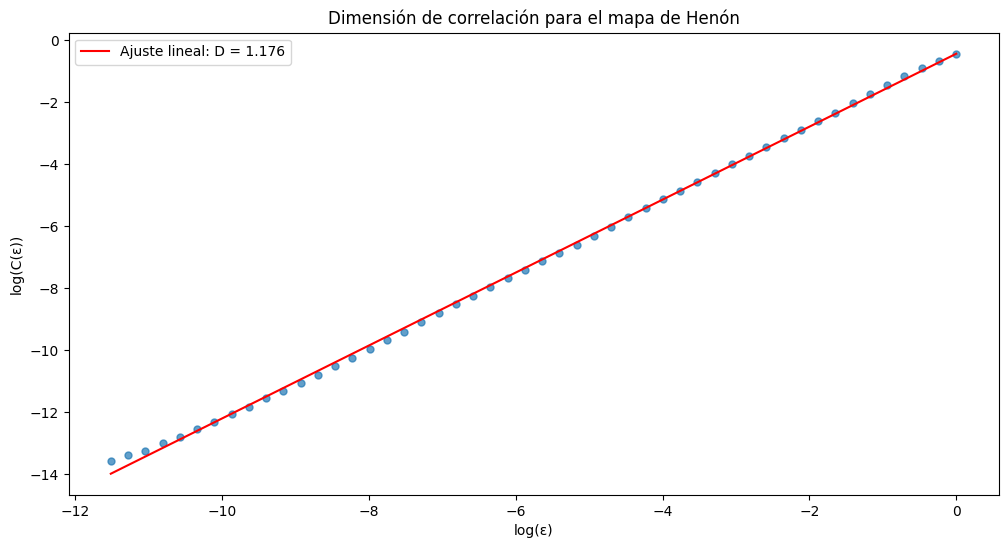

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Parámetros del mapa de Henón
a = 1.4
b = 0.3
n = 10_000  # Tamaño reducido para eficiencia
x = np.zeros(n)
y = np.zeros(n)

# Condiciones iniciales
x[0] = 0.1
y[0] = 0.3

# Generación del mapa de Henón
for i in range(1, n):
    x[i] = 1 - a * x[i-1]**2 + y[i-1]
    y[i] = b * x[i-1]

# Guardar los datos
data = np.vstack((x, y)).T
np.savetxt("henon_map_data.txt", data)

# Función de correlación
def correlation_dimension(data, epsilons):
    d = pdist(data)
    c = np.zeros(len(epsilons))

    # Cálculo de C(ε) para cada epsilon
    for i, epsilon in enumerate(epsilons):
        c[i] = np.sum(d < epsilon)

    # Normalización de C(ε)
    c = c * 2 / (len(data) * (len(data) - 1))
    return c

# Rango de epsilons
epsilons = np.logspace(-5, 0, 50)

# Calcular la dimensión de correlación
c_epsilons = correlation_dimension(data, epsilons)

# Verificar que no haya valores cero o negativos en C(ε)
if np.any(c_epsilons <= 0):
    raise ValueError("Valores de C(ε) no deben ser cero o negativos. Ajusta el rango de ε.")

# Ajuste lineal en escala log-log para obtener la dimensión de correlación
log_epsilons = np.log(epsilons)
log_c_epsilons = np.log(c_epsilons)

coeffs = np.polyfit(log_epsilons, log_c_epsilons, 1)
D = coeffs[0]

print(f"Dimensión de correlación D para el mapa de Henón: {D:.5f}")

# Graficar la función de correlación
plt.figure(figsize=(12, 6))
plt.plot(log_epsilons, log_c_epsilons, 'o', markersize=5, alpha=0.7)
plt.plot(log_epsilons, np.polyval(coeffs, log_epsilons), 'r', label=f"Ajuste lineal: D = {D:.3f}")
plt.title('Dimensión de correlación para el mapa de Henón')
plt.xlabel('log(ε)')
plt.ylabel('log(C(ε))')
plt.legend()
plt.show()

Lyapunov para Henón

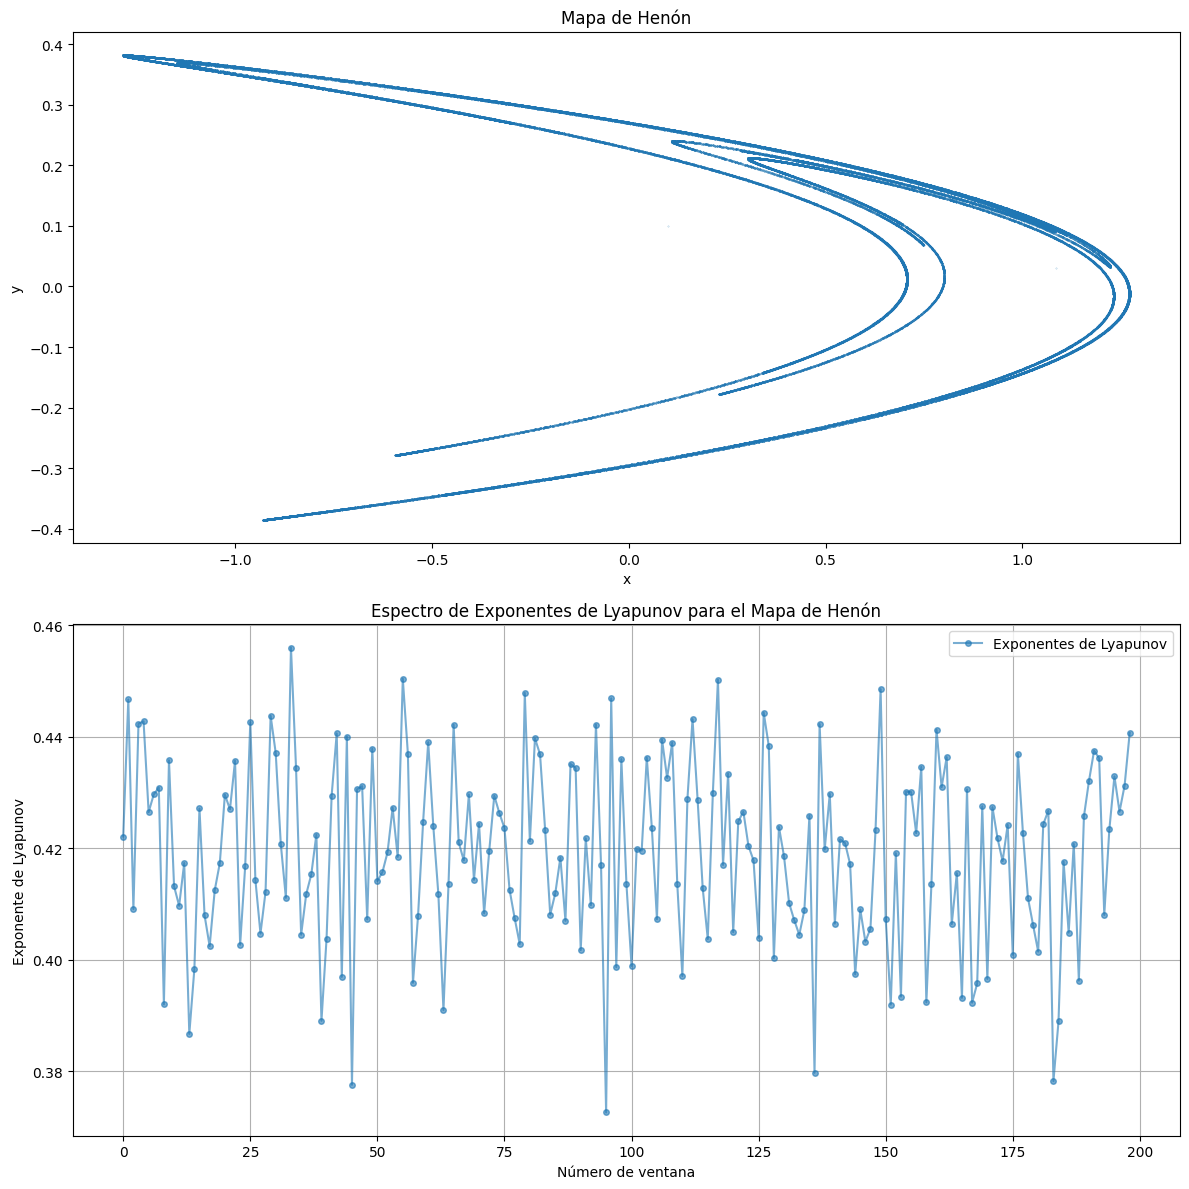

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del mapa de Henón
a = 1.4
b = 0.3

# Número de iteraciones
num_iterations = 100000

# Inicializar los arrays para almacenar los valores de x e y
x = np.zeros(num_iterations)
y = np.zeros(num_iterations)

# Condiciones iniciales
x[0], y[0] = 0.1, 0.1  # Iniciales pequeñas pero no cero

def henon_map(x, y, a, b):
    return 1 - a * x**2 + y, b * x

# Generar los puntos del mapa de Henón
for n in range(num_iterations - 1):
    x[n + 1], y[n + 1] = henon_map(x[n], y[n], a, b)

# Función para calcular los exponentes de Lyapunov en ventanas
def lyapunov_exponent_window(x, y, a, b, num_iterations, window_size):
    exponents = []
    for i in range(0, num_iterations - window_size, window_size):
        v = np.array([1, 1])  # Vector tangente inicial
        lyapunov_sum = 0
        for j in range(i, i + window_size):
            dx_dx = -2 * a * x[j]
            dx_dy = 1
            dy_dx = b
            dy_dy = 0
            J = np.array([[dx_dx, dx_dy], [dy_dx, dy_dy]])
            v = J @ v
            norm = np.linalg.norm(v)
            lyapunov_sum += np.log(norm)
            v /= norm
        exponents.append(lyapunov_sum / window_size)
    return np.array(exponents)

window_size = 500  # Define el tamaño de la ventana para calcular los exponentes
lyapunov_exps = lyapunov_exponent_window(x, y, a, b, num_iterations, window_size)

# Gráficas
plt.figure(figsize=(12, 12))

# Gráfica del mapa de Henón
plt.subplot(2, 1, 1)
plt.plot(x, y, '.', markersize=0.5, alpha=0.5)
plt.title('Mapa de Henón')
plt.xlabel('x')
plt.ylabel('y')

# Gráfica del espectro de los exponentes de Lyapunov
plt.subplot(2, 1, 2)
plt.plot(lyapunov_exps, 'o-', markersize=4, alpha=0.6, label='Exponentes de Lyapunov')
plt.title('Espectro de Exponentes de Lyapunov para el Mapa de Henón')
plt.xlabel('Número de ventana')
plt.ylabel('Exponente de Lyapunov')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

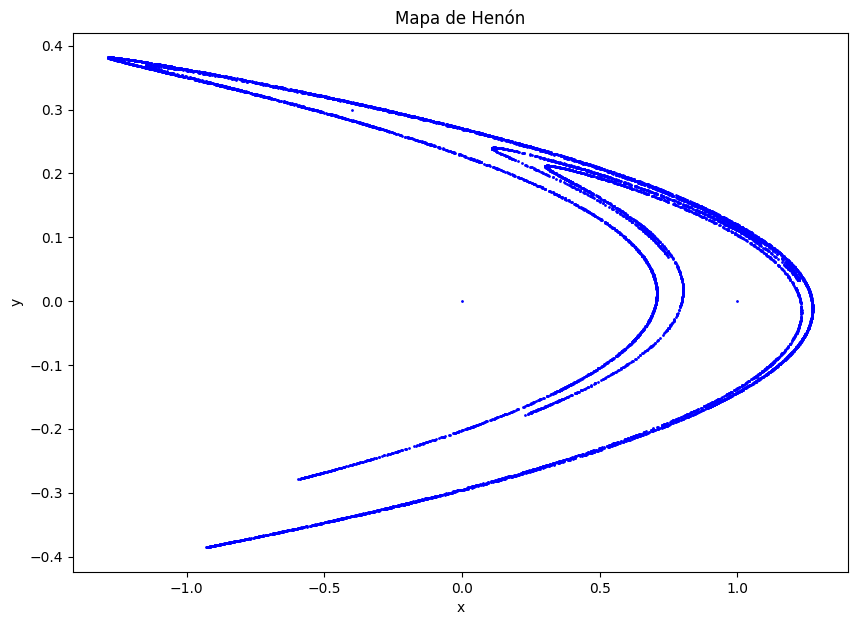

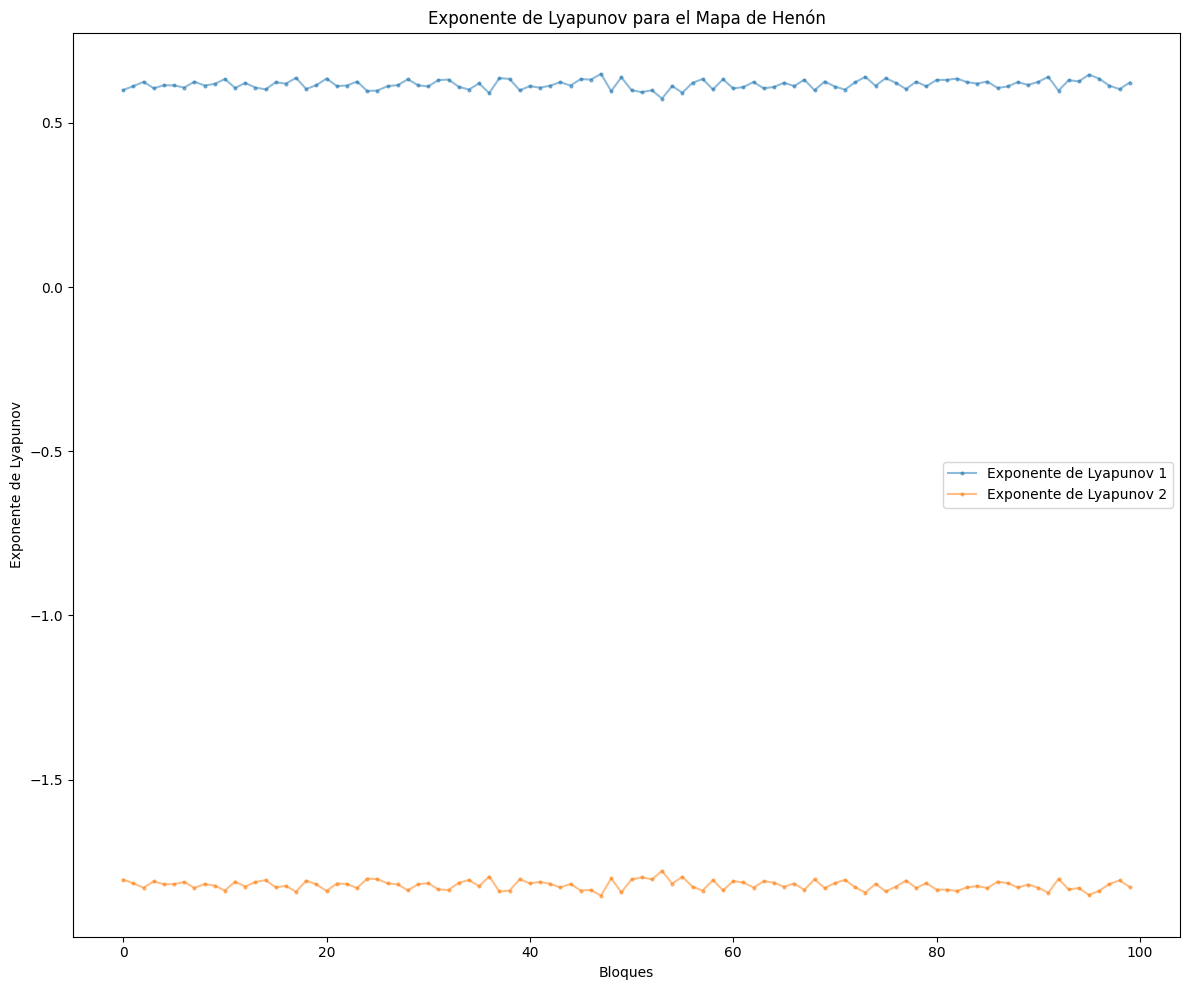

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del mapa de Henón
a = 1.4
b = 0.3

# Número de iteraciones
num_iterations = 10000

# Inicializar los arrays para almacenar los valores de x e y
x = np.zeros(num_iterations)
y = np.zeros(num_iterations)

# Condiciones iniciales
x[0] = 0
y[0] = 0

# Generar los puntos del mapa de Henón
for n in range(num_iterations - 1):
    x[n + 1] = 1 - a * x[n]**2 + y[n]
    y[n + 1] = b * x[n]

# Graficar los puntos con mayor grosor
plt.figure(figsize=(10, 7))
plt.plot(x, y, '.', markersize=2, color='blue')
plt.title('Mapa de Henón')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Guardar los valores de x e y en archivos .txt
np.savetxt("henon_x.txt", x)
np.savetxt("henon_y.txt", y)

def lyapunov_exponent(x_values, y_values, a, b, window_size=100):
    num_blocks = len(x_values) // window_size
    exponents_1 = []
    exponents_2 = []

    for i in range(num_blocks):
        start = i * window_size
        end = start + window_size
        x_block = x_values[start:end]
        y_block = y_values[start:end]
        lyapunov_sum_1 = 0
        lyapunov_sum_2 = 0

        for x, y in zip(x_block, y_block):
            jacobian = np.array([[-2 * a * x, 1], [b, 0]])
            eigvals = np.linalg.eigvals(jacobian)
            lyapunov_sum_1 += np.log(np.abs(eigvals[0]))
            lyapunov_sum_2 += np.log(np.abs(eigvals[1]))

        lyapunov_exp_1 = lyapunov_sum_1 / window_size
        lyapunov_exp_2 = lyapunov_sum_2 / window_size
        exponents_1.append(lyapunov_exp_1)
        exponents_2.append(lyapunov_exp_2)

    return np.array(exponents_1), np.array(exponents_2)

# Cálculo de los exponentes de Lyapunov
window_size = 100
lyapunov_exps_1, lyapunov_exps_2 = lyapunov_exponent(x, y, a, b, window_size)

# Creación de la gráfica para visualizar los exponentes de Lyapunov
plt.figure(figsize=(12, 10))
plt.title('Exponente de Lyapunov para el Mapa de Henón')
plt.xlabel('Bloques')
plt.ylabel('Exponente de Lyapunov')
plt.plot(np.arange(len(lyapunov_exps_1)), lyapunov_exps_1, 'o-', markersize=2, alpha=0.5, label='Exponente de Lyapunov 1')
plt.plot(np.arange(len(lyapunov_exps_2)), lyapunov_exps_2, 'o-', markersize=2, alpha=0.5, label='Exponente de Lyapunov 2')
plt.legend()
plt.tight_layout()
plt.show()

# Guardar los exponentes de Lyapunov en un archivo
np.savetxt("lyapunov_exponents_henon_1.txt", lyapunov_exps_1, fmt='%.18f')
np.savetxt("lyapunov_exponents_henon_2.txt", lyapunov_exps_2, fmt='%.18f')

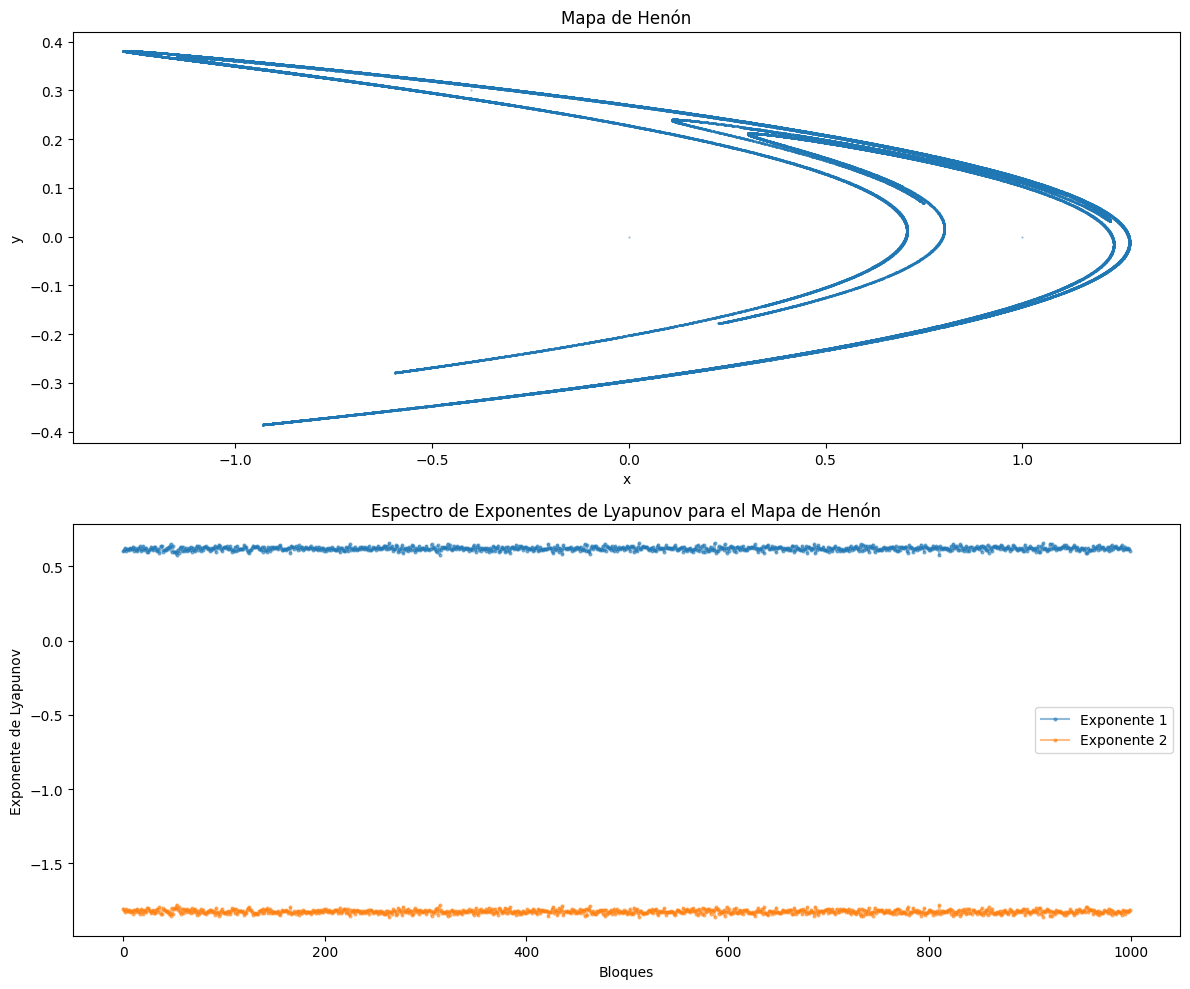

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del mapa de Henón
a = 1.4
b = 0.3

# Número de iteraciones
num_iterations = 100000

# Inicializar los arrays para almacenar los valores de x e y
x = np.zeros(num_iterations)
y = np.zeros(num_iterations)

# Condiciones iniciales
x[0] = 0
y[0] = 0

# Generar los puntos del mapa de Henón
for n in range(num_iterations - 1):
    x[n + 1] = 1 - a * x[n]**2 + y[n]
    y[n + 1] = b * x[n]

# Guardar los valores de x e y en archivos .txt
np.savetxt("henon_x.txt", x)
np.savetxt("henon_y.txt", y)

def lyapunov_exponent_spectrum(x_values, y_values, a, b, window_size=100):
    num_blocks = len(x_values) // window_size
    exponents_1 = []
    exponents_2 = []

    for i in range(num_blocks):
        start = i * window_size
        end = start + window_size
        x_block = x_values[start:end]
        y_block = y_values[start:end]
        lyapunov_sum_1 = 0
        lyapunov_sum_2 = 0

        for x, y in zip(x_block, y_block):
            jacobian = np.array([[-2 * a * x, 1], [b, 0]])
            eigvals = np.linalg.eigvals(jacobian)
            lyapunov_sum_1 += np.log(np.abs(eigvals[0]))
            lyapunov_sum_2 += np.log(np.abs(eigvals[1]))

        lyapunov_exp_1 = lyapunov_sum_1 / window_size
        lyapunov_exp_2 = lyapunov_sum_2 / window_size
        exponents_1.append(lyapunov_exp_1)
        exponents_2.append(lyapunov_exp_2)

    return np.array(exponents_1), np.array(exponents_2)

# Cálculo de los exponentes de Lyapunov
window_size = 100
lyapunov_exps_1, lyapunov_exps_2 = lyapunov_exponent_spectrum(x, y, a, b, window_size)

# Creación de la gráfica para visualizar los exponentes de Lyapunov
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.title('Mapa de Henón')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'o', markersize=0.5, alpha=0.5)

plt.subplot(2, 1, 2)
plt.title('Espectro de Exponentes de Lyapunov para el Mapa de Henón')
plt.xlabel('Bloques')
plt.ylabel('Exponente de Lyapunov')
plt.plot(np.arange(len(lyapunov_exps_1)), lyapunov_exps_1, 'o-', markersize=2, alpha=0.5, label='Exponente 1')
plt.plot(np.arange(len(lyapunov_exps_2)), lyapunov_exps_2, 'o-', markersize=2, alpha=0.5, label='Exponente 2')
plt.legend()
plt.tight_layout()
plt.show()

# Guardar los exponentes de Lyapunov en un archivo
np.savetxt("lyapunov_exponents_henon_1.txt", lyapunov_exps_1, fmt='%.18f')
np.savetxt("lyapunov_exponents_henon_2.txt", lyapunov_exps_2, fmt='%.18f')

Lyapunov para Rössler

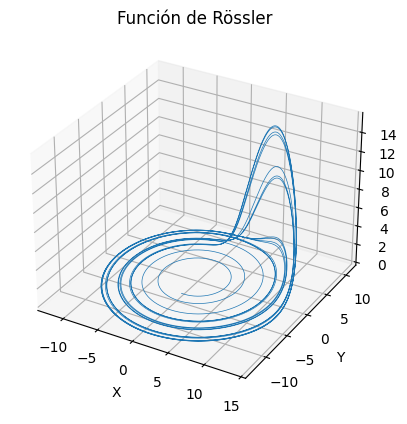

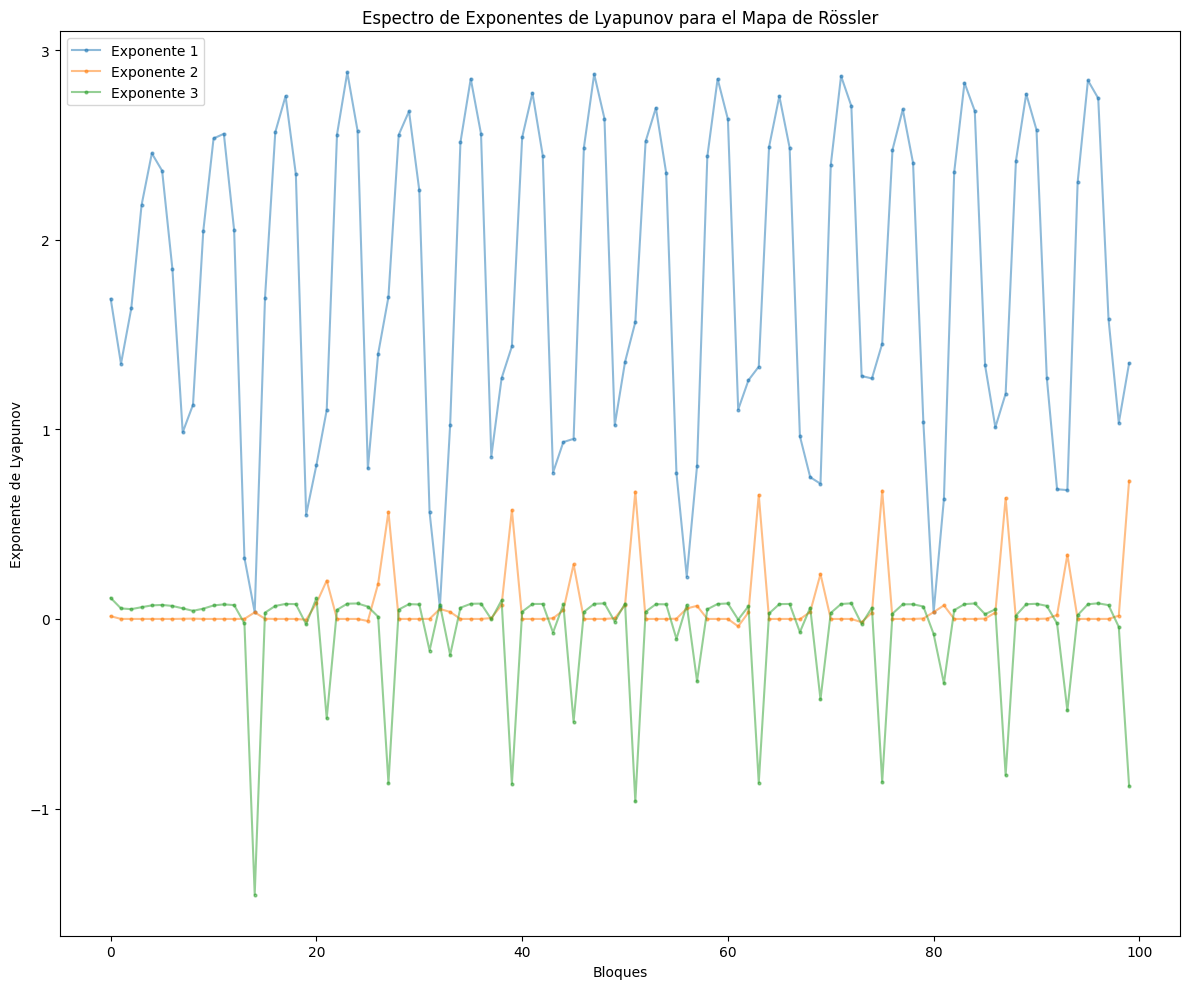

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos los parámetros de Rössler
a = 0.1
b = 0.1
d = 8.0
dt = 0.01  # Paso de tiempo
n = 10000  # Número de iteraciones

# Inicializamos los arrays para x, y, z
x = np.zeros(n)
y = np.zeros(n)
z = np.zeros(n)

# Condiciones iniciales
x[0] = 0.0
y[0] = -3.8
z[0] = 0.0

# Iteramos para llenar los arrays con los valores de Rössler
for i in range(1, n):
    x[i] = x[i-1] + (-y[i-1] - z[i-1]) * dt
    y[i] = y[i-1] + (x[i-1] + a * y[i-1]) * dt
    z[i] = z[i-1] + (b + z[i-1] * (x[i-1] - d)) * dt

# Guardamos los datos en archivos de texto
np.savetxt("rossler_x.txt", x)
np.savetxt("rossler_y.txt", y)
np.savetxt("rossler_z.txt", z)

# Creamos la gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujamos la curva en 3D
ax.plot(x, y, z, lw=0.5)

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Función de Rössler')

# Mostramos la gráfica
plt.show()

def lyapunov_exponent_spectrum(x_values, y_values, z_values, a, b, d, dt, window_size=100):
    def jacobian(x, y, z, a, b, d):
        return np.array([
            [0, -1, -1],
            [1, a, 0],
            [z, 0, x - d]
        ])

    num_blocks = len(x_values) // window_size
    exponents_1 = []
    exponents_2 = []
    exponents_3 = []

    for i in range(num_blocks):
        start = i * window_size
        end = start + window_size
        x_block = x_values[start:end]
        y_block = y_values[start:end]
        z_block = z_values[start:end]
        lyapunov_sum_1 = 0
        lyapunov_sum_2 = 0
        lyapunov_sum_3 = 0
        w = np.eye(3)

        for x, y, z in zip(x_block, y_block, z_block):
            J = jacobian(x, y, z, a, b, d)
            w = np.dot(J, w)
            Q, R = np.linalg.qr(w)
            w = Q
            lyapunov_sum_1 += np.log(np.abs(R[0, 0]))
            lyapunov_sum_2 += np.log(np.abs(R[1, 1]))
            lyapunov_sum_3 += np.log(np.abs(R[2, 2]))

        lyapunov_exp_1 = lyapunov_sum_1 / window_size
        lyapunov_exp_2 = lyapunov_sum_2 / window_size
        lyapunov_exp_3 = lyapunov_sum_3 / window_size
        exponents_1.append(lyapunov_exp_1)
        exponents_2.append(lyapunov_exp_2)
        exponents_3.append(lyapunov_exp_3)

    return np.array(exponents_1), np.array(exponents_2), np.array(exponents_3)

# Cálculo de los exponentes de Lyapunov
window_size = 100
lyapunov_exps_1, lyapunov_exps_2, lyapunov_exps_3 = lyapunov_exponent_spectrum(x, y, z, a, b, d, dt, window_size)

# Creación de la gráfica para visualizar los exponentes de Lyapunov
plt.figure(figsize=(12, 10))
plt.title('Espectro de Exponentes de Lyapunov para el Mapa de Rössler')
plt.xlabel('Bloques')
plt.ylabel('Exponente de Lyapunov')
plt.plot(np.arange(len(lyapunov_exps_1)), lyapunov_exps_1, 'o-', markersize=2, alpha=0.5, label='Exponente 1')
plt.plot(np.arange(len(lyapunov_exps_2)), lyapunov_exps_2, 'o-', markersize=2, alpha=0.5, label='Exponente 2')
plt.plot(np.arange(len(lyapunov_exps_3)), lyapunov_exps_3, 'o-', markersize=2, alpha=0.5, label='Exponente 3')
plt.legend()
plt.tight_layout()
plt.show()

# Guardar los exponentes de Lyapunov en un archivo
np.savetxt("lyapunov_exponents_rossler_1.txt", lyapunov_exps_1, fmt='%.18f')
np.savetxt("lyapunov_exponents_rossler_2.txt", lyapunov_exps_2, fmt='%.18f')
np.savetxt("lyapunov_exponents_rossler_3.txt", lyapunov_exps_3, fmt='%.18f')

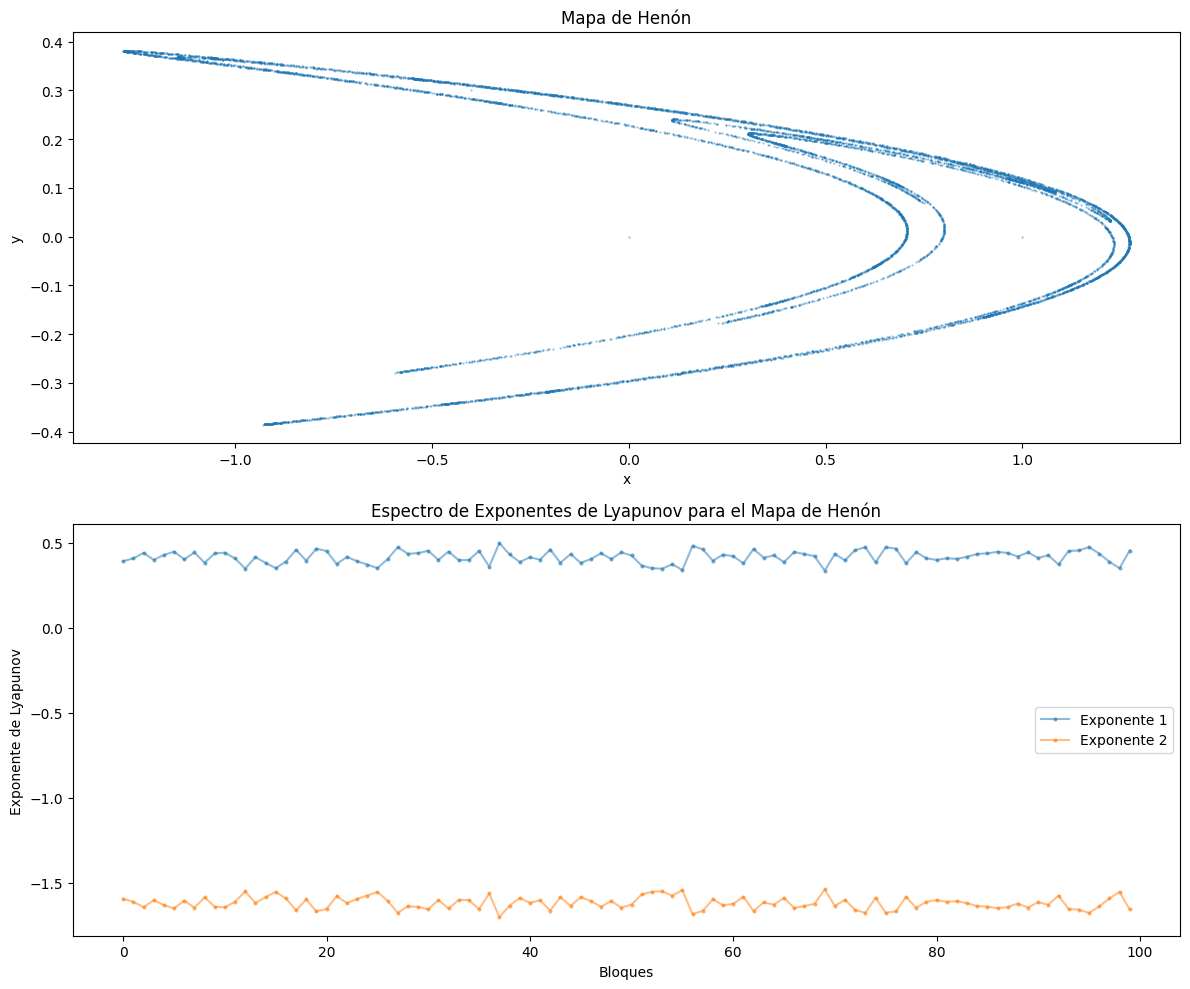

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del mapa de Henón
a = 1.4
b = 0.3

# Número de iteraciones
num_iterations = 10000

# Inicializar los arrays para almacenar los valores de x e y
x = np.zeros(num_iterations)
y = np.zeros(num_iterations)

# Condiciones iniciales
x[0] = 0
y[0] = 0

# Generar los puntos del mapa de Henón
for n in range(num_iterations - 1):
    x[n + 1] = 1 - a * x[n]**2 + y[n]
    y[n + 1] = b * x[n]

'''# Graficar los puntos con mayor grosor
plt.figure(figsize=(10, 7))
plt.plot(x, y, '.', markersize=2, color='blue')
plt.title('Mapa de Henón')
plt.xlabel('x')
plt.ylabel('y')
plt.show()'''

# Guardar los valores de x e y en archivos .txt
np.savetxt("henon_x.txt", x)
np.savetxt("henon_y.txt", y)

def lyapunov_exponent_qr(x_values, y_values, a, b, window_size=100):
    num_blocks = len(x_values) // window_size
    exponents_1 = []
    exponents_2 = []

    for i in range(num_blocks):
        start = i * window_size
        end = start + window_size
        x_block = x_values[start:end]
        y_block = y_values[start:end]
        lyapunov_sum_1 = 0
        lyapunov_sum_2 = 0
        w = np.eye(2)

        for x, y in zip(x_block, y_block):
            jacobian = np.array([[-2 * a * x, 1], [b, 0]])
            w = np.dot(jacobian, w)
            Q, R = np.linalg.qr(w)
            w = Q
            lyapunov_sum_1 += np.log(np.abs(R[0, 0]))
            lyapunov_sum_2 += np.log(np.abs(R[1, 1]))

        lyapunov_exp_1 = lyapunov_sum_1 / window_size
        lyapunov_exp_2 = lyapunov_sum_2 / window_size
        exponents_1.append(lyapunov_exp_1)
        exponents_2.append(lyapunov_exp_2)

    return np.array(exponents_1), np.array(exponents_2)

# Cálculo de los exponentes de Lyapunov con descomposición QR
window_size = 100
lyapunov_exps_1, lyapunov_exps_2 = lyapunov_exponent_qr(x, y, a, b, window_size)

# Creación de la gráfica para visualizar los exponentes de Lyapunov
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.title('Mapa de Henón')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'o', markersize=0.5, alpha=0.5)

plt.subplot(2, 1, 2)
plt.title('Espectro de Exponentes de Lyapunov para el Mapa de Henón')
plt.xlabel('Bloques')
plt.ylabel('Exponente de Lyapunov')
plt.plot(np.arange(len(lyapunov_exps_1)), lyapunov_exps_1, 'o-', markersize=2, alpha=0.5, label='Exponente 1')
plt.plot(np.arange(len(lyapunov_exps_2)), lyapunov_exps_2, 'o-', markersize=2, alpha=0.5, label='Exponente 2')
plt.legend()
plt.tight_layout()
plt.show()

# Guardar los exponentes de Lyapunov en un archivo
np.savetxt("lyapunov_exponents_henon_1.txt", lyapunov_exps_1, fmt='%.18f')
np.savetxt("lyapunov_exponents_henon_2.txt", lyapunov_exps_2, fmt='%.18f')